In [1]:
import pandas as pd
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import onekey_algo.custom.components as okcomp
from onekey_algo import get_param_in_cwd

plt.rcParams['figure.dpi'] = 300
model_names = get_param_in_cwd('compare_algos')
# 获取配置
task = get_param_in_cwd('task_column')
sel_m = get_param_in_cwd('sel_model')
labelf = get_param_in_cwd('label_file') or os.path.join(mydir, 'label.csv')
group_info = get_param_in_cwd('dataset_column') or 'group'

# 读取label文件。
labels = [task]
label_data_ = pd.read_csv(labelf)
label_data_['ID'] = label_data_['ID'].map(lambda x: f"{x}.nii.gz" if not (f"{x}".endswith('.nii.gz') or  f"{x}".endswith('.nii')) else x)
label_data_ = label_data_[['ID', group_info, task]]
label_data_ = label_data_.dropna(axis=0)

ids = label_data_['ID']
print(label_data_.columns)
label_data = label_data_
label_data

Index(['ID', 'group', 'label'], dtype='object')


ID  group  label
0       1.nii.gz  train      0
1     100.nii.gz    val      1
2    1001.nii.gz  train      0
3    1003.nii.gz  train      1
4     101.nii.gz    val      0
..           ...    ...    ...
755   978.nii.gz  train      0
756   980.nii.gz  train      1
757   981.nii.gz  train      1
758   984.nii.gz  train      1
759    99.nii.gz  train      1

[760 rows x 3 columns]

# 训练集-Nomogram

ID   -0_x  Intra_ExtraTrees   -0_y  Intra_LR  -0_x  Intra_KNN  \
0       1.nii.gz  0.585             0.415  0.671     0.329   1.0        0.0   
1    1001.nii.gz  0.418             0.582  0.202     0.798   0.4        0.6   
2    1003.nii.gz  0.296             0.704  0.123     0.877   0.2        0.8   
3    1024.nii.gz  0.586             0.414  0.612     0.388   0.8        0.2   
4    1029.nii.gz  0.437             0.563  0.310     0.690   0.4        0.6   
..           ...    ...               ...    ...       ...   ...        ...   
437   978.nii.gz  0.568             0.432  0.683     0.317   0.8        0.2   
438   980.nii.gz  0.272             0.728  0.088     0.912   0.0        1.0   
439   981.nii.gz  0.433             0.567  0.564     0.436   0.2        0.8   
440   984.nii.gz  0.587             0.413  0.467     0.533   0.2        0.8   
441    99.nii.gz  0.532             0.468  0.470     0.530   0.2        0.8   

      -0_y  Intra_RandomForest   -0_x  Intra_XGBoost   -0_y  Intra_LightGBM  \
0    0.684               0.316  0.771          0.229  0.539           0.461   
1    0.335               0.665  0.510          0.490  0.473           0.527   
2    0.058               0.942  0.061          0.939  0.473           0.527   
3    0.724               0.276  0.841          0.159  0.539           0.461   
4    0.354               0.646  0.165          0.835  0.473           0.527   
..     ...                 ...    ...            ...    ...             ...   
437  0.755               0.245  0.823          0.177  0.539           0.461   
438  0.222               0.778  0.095          0.905  0.473           0.527   
439  0.491               0.509  0.444          0.556  0.473           0.527   
440  0.591               0.409  0.169          0.831  0.539           0.461   
441  0.478               0.522  0.265          0.735  0.473           0.527   

        -0  Intra_MLP  location  group  label  
0    0.610      0.390         2  train      0  
1    0.284      0.716         2  train      0  
2    0.109      0.891         1  train      1  
3    0.717      0.283         2  train      0  
4    0.319      0.681         1  train      1  
..     ...        ...       ...    ...    ...  
437  0.658      0.342         2  train      0  
438  0.109      0.891         1  train      1  
439  0.505      0.495         1  train      1  
440  0.530      0.470         1  train      1  
441  0.442      0.558         1  train      1  

[442 rows x 18 columns]

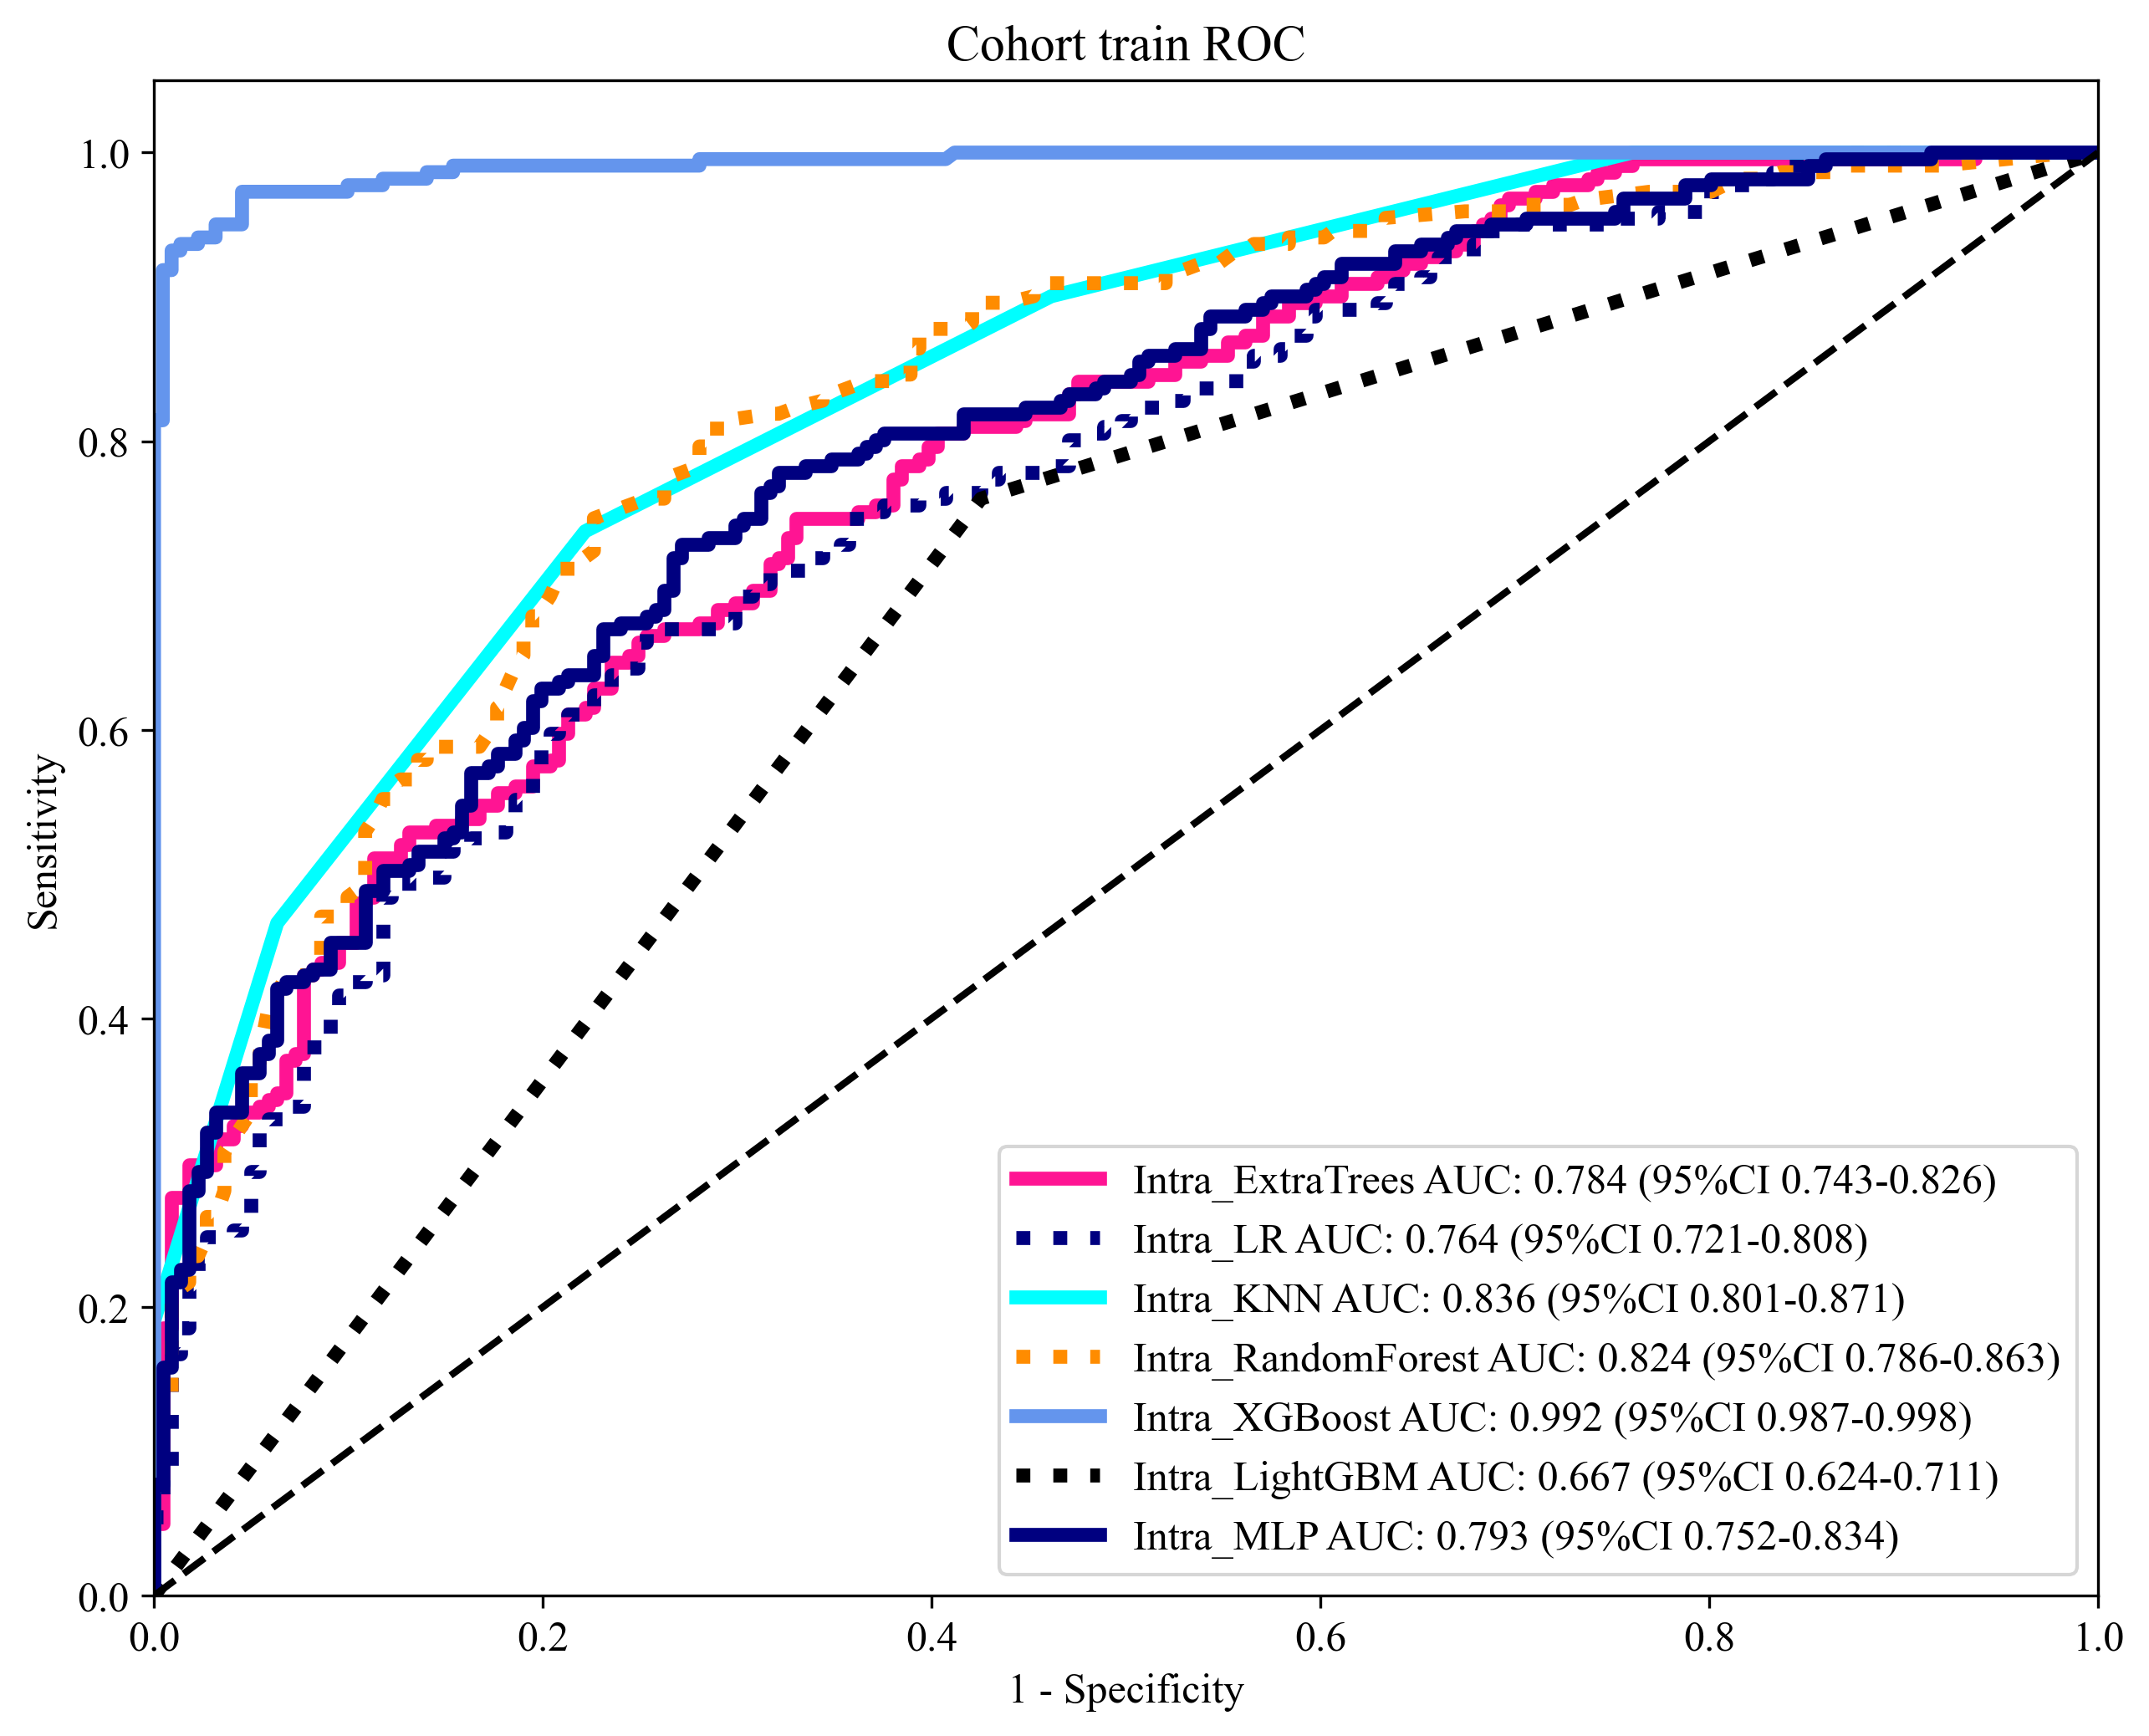

Signature  Accuracy    AUC           95% CI  Sensitivity  \
0    Intra_ExtraTrees     0.708  0.784  0.7429 - 0.8258        0.747   
1            Intra_LR     0.708  0.764  0.7206 - 0.8077        0.670   
2           Intra_KNN     0.758  0.836  0.8010 - 0.8712        0.738   
3  Intra_RandomForest     0.762  0.824  0.7862 - 0.8628        0.814   
4       Intra_XGBoost     0.964  0.992  0.9870 - 0.9980        0.973   
5      Intra_LightGBM     0.667  0.667  0.6243 - 0.7106        0.760   
6           Intra_MLP     0.729  0.793  0.7521 - 0.8340        0.729   

   Specificity    PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0        0.670  0.693  0.725      0.693   0.747  0.719      0.482  train  
1        0.747  0.725  0.693      0.725   0.670  0.696      0.511  train  
2        0.778  0.769  0.748      0.769   0.738  0.753      0.600  train  
3        0.710  0.738  0.793      0.738   0.814  0.774      0.446  train  
4        0.955  0.956  0.972      0.956   0.973  0.964      0.467  train  
5        0.575  0.641  0.706      0.641   0.760  0.696      0.527  train  
6        0.729  0.729  0.729      0.729   0.729  0.729      0.488  train

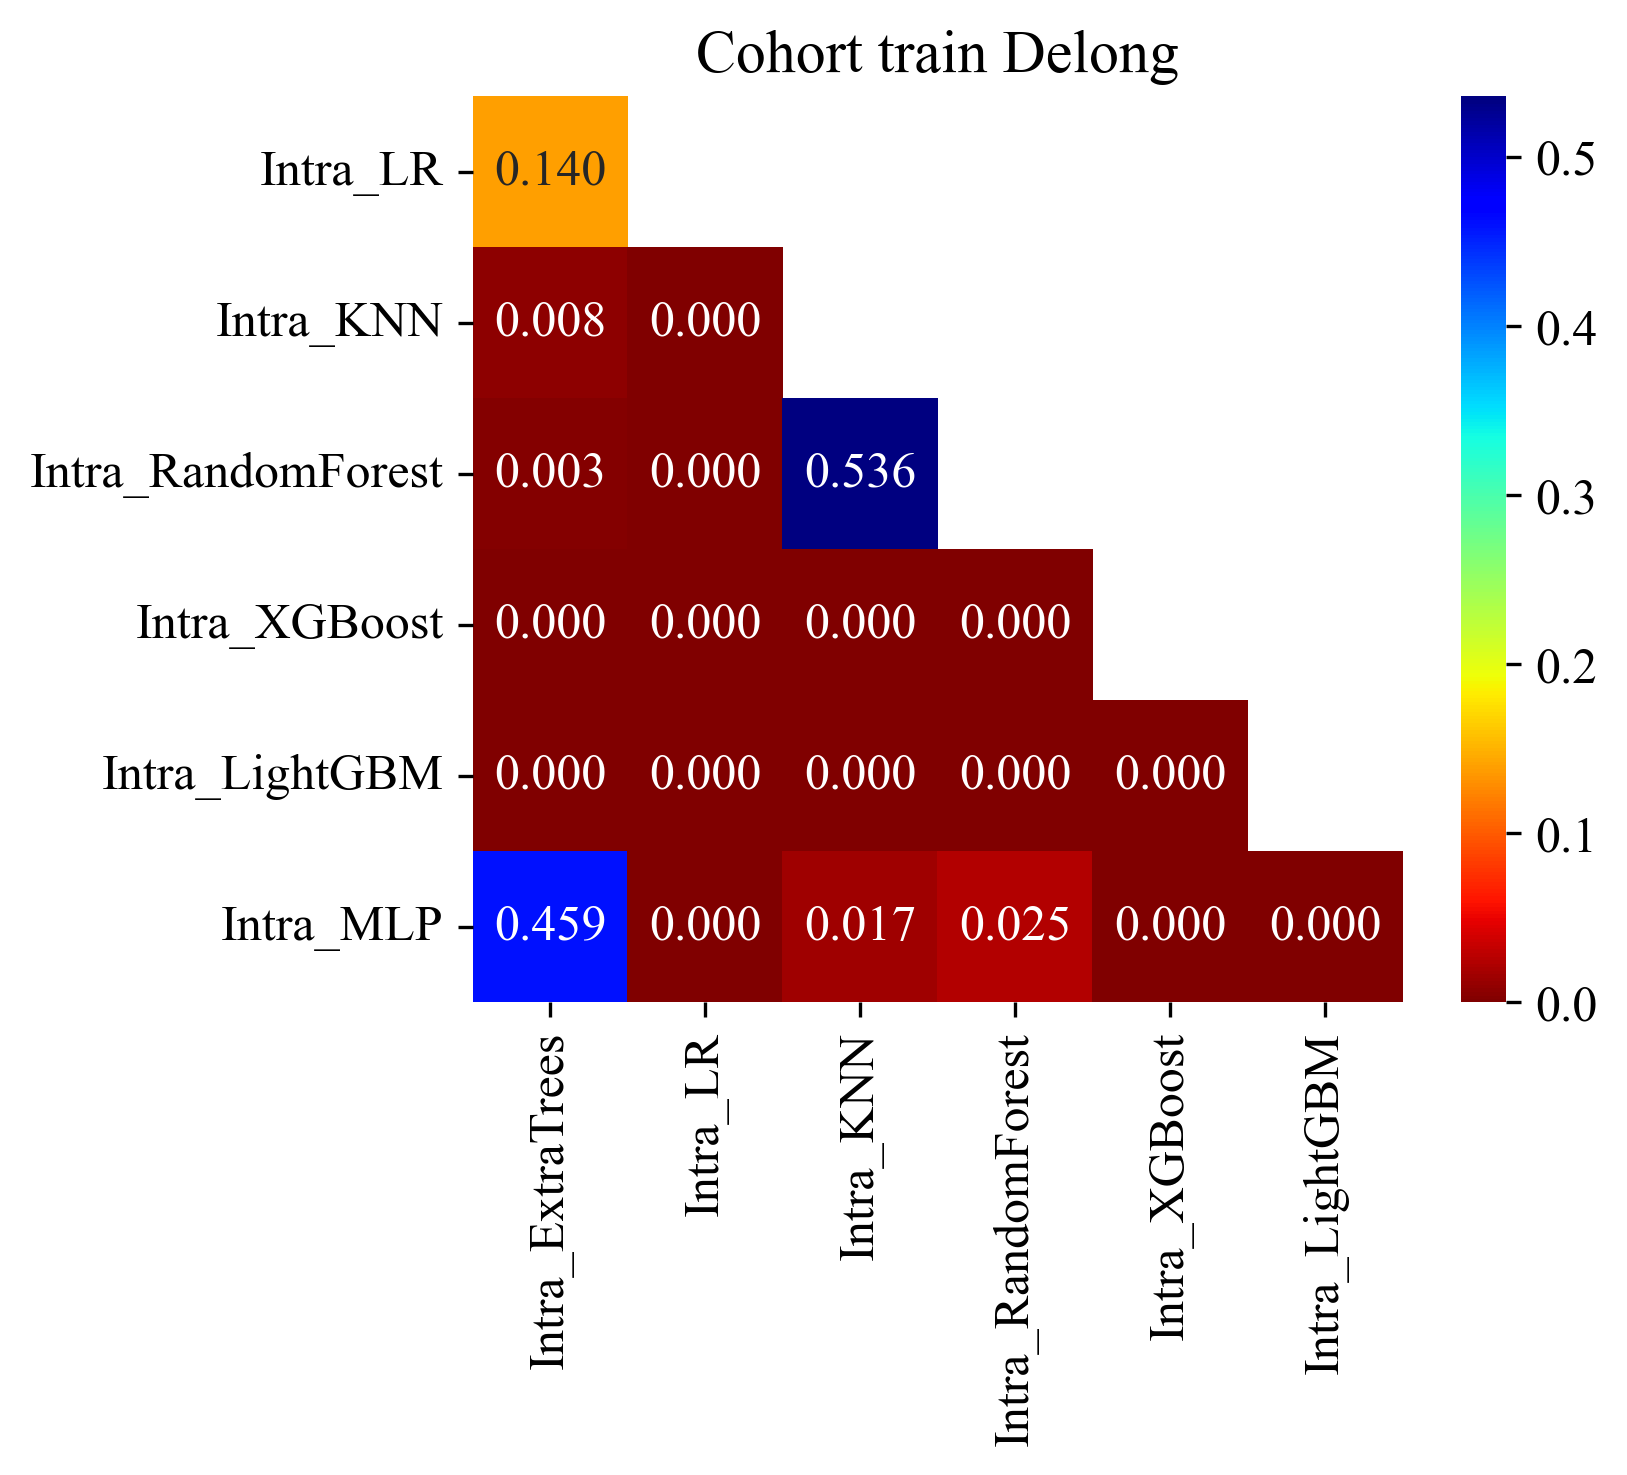

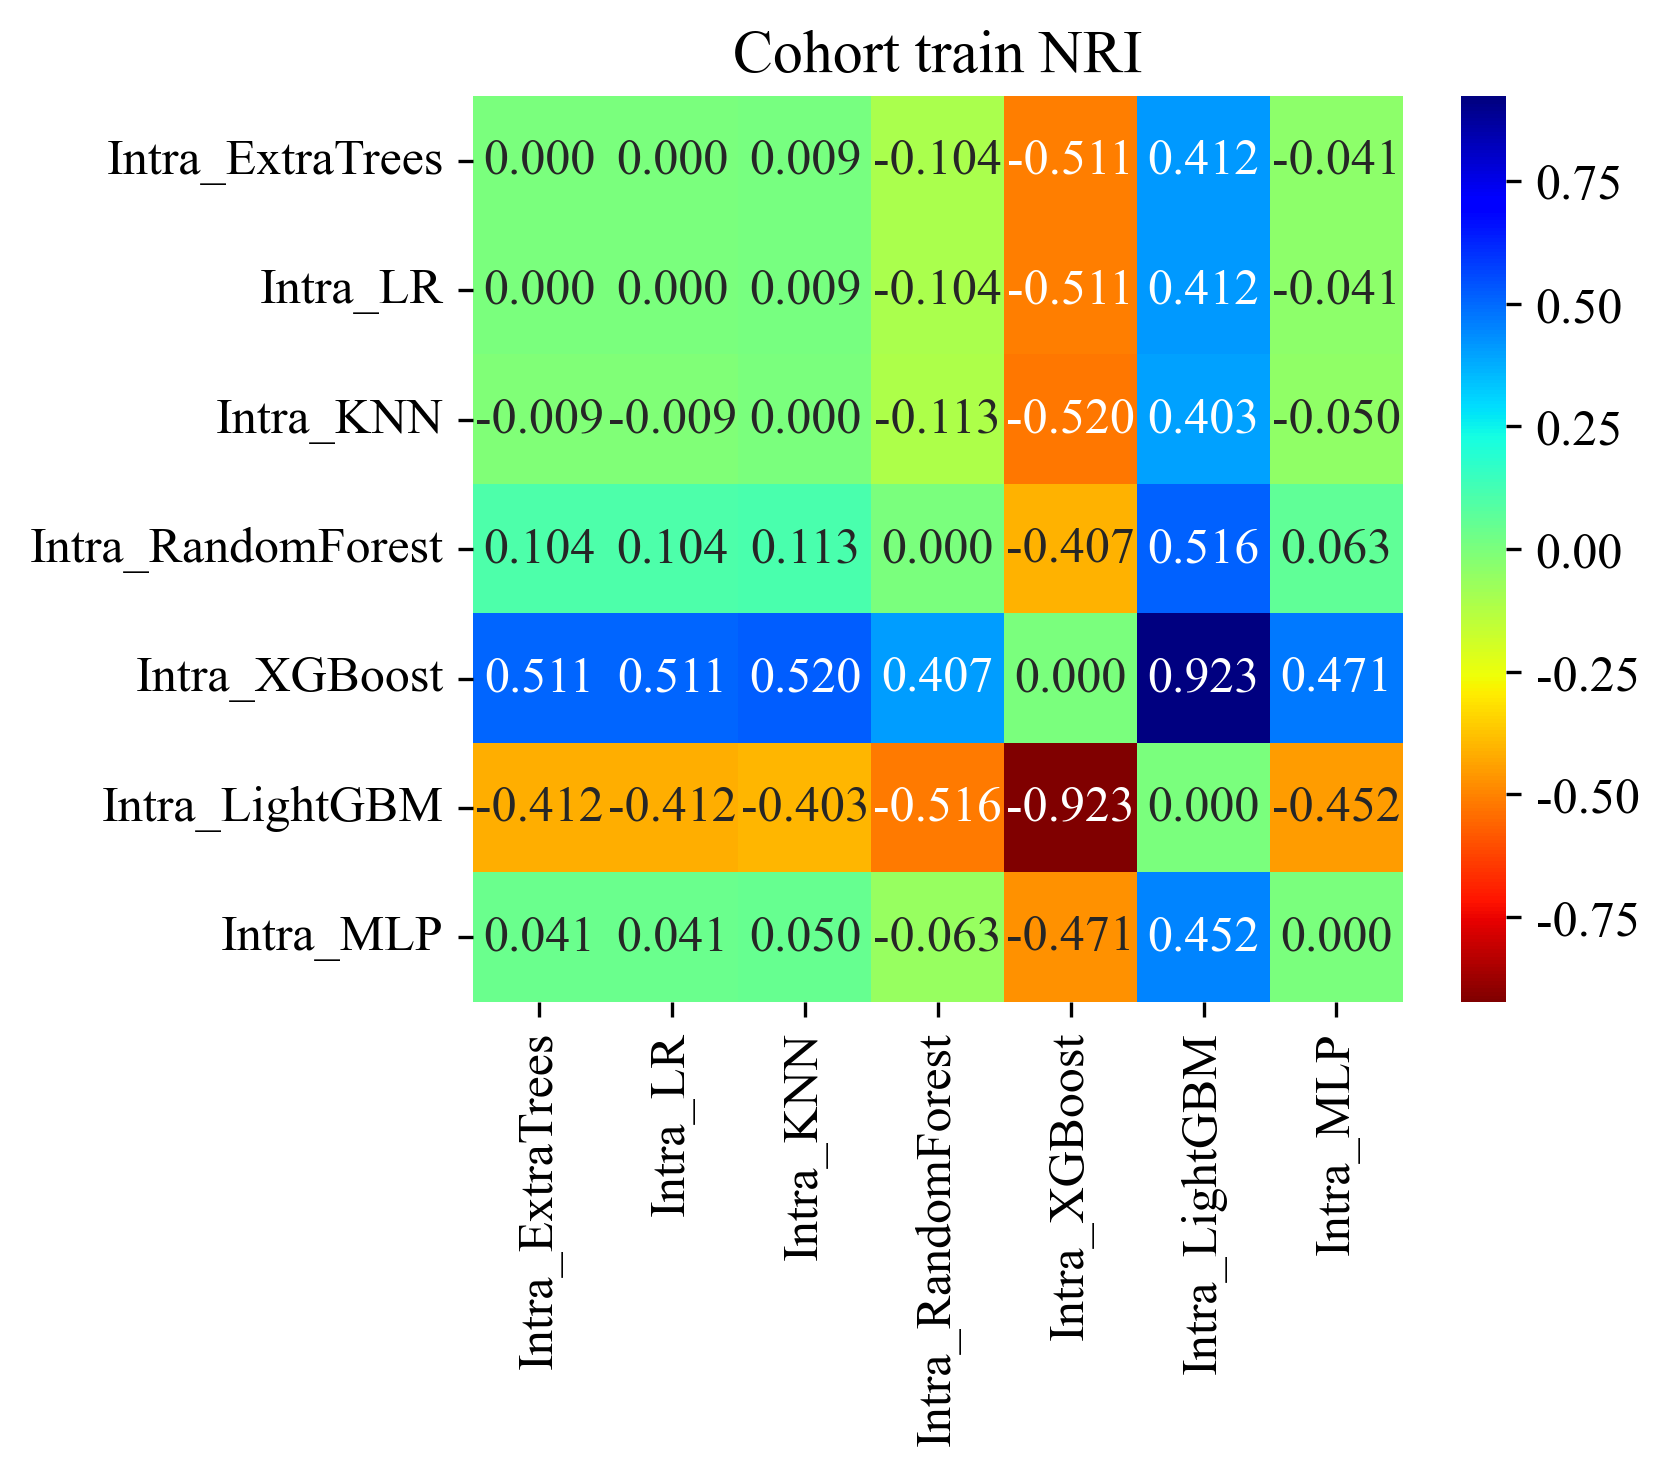

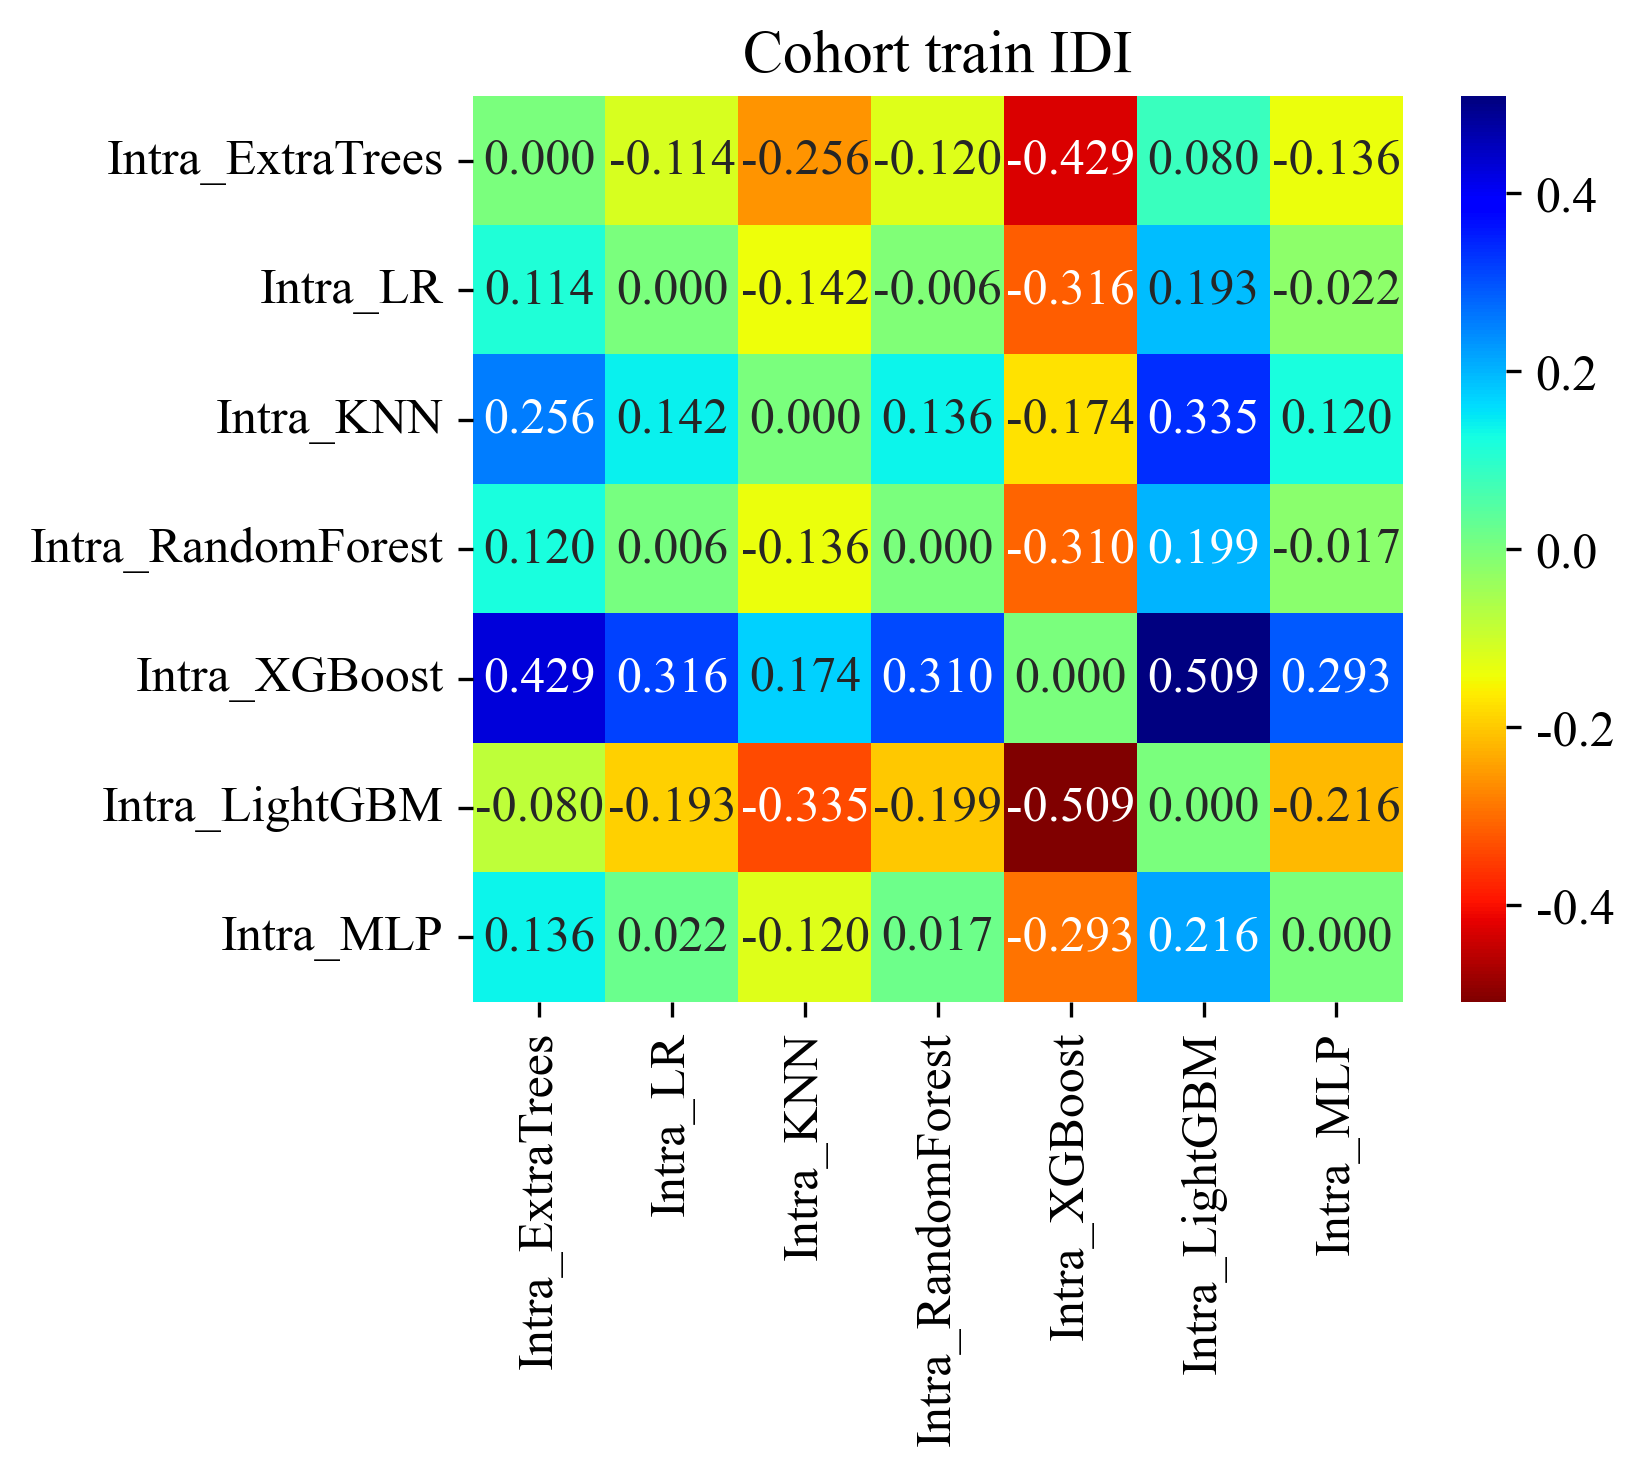

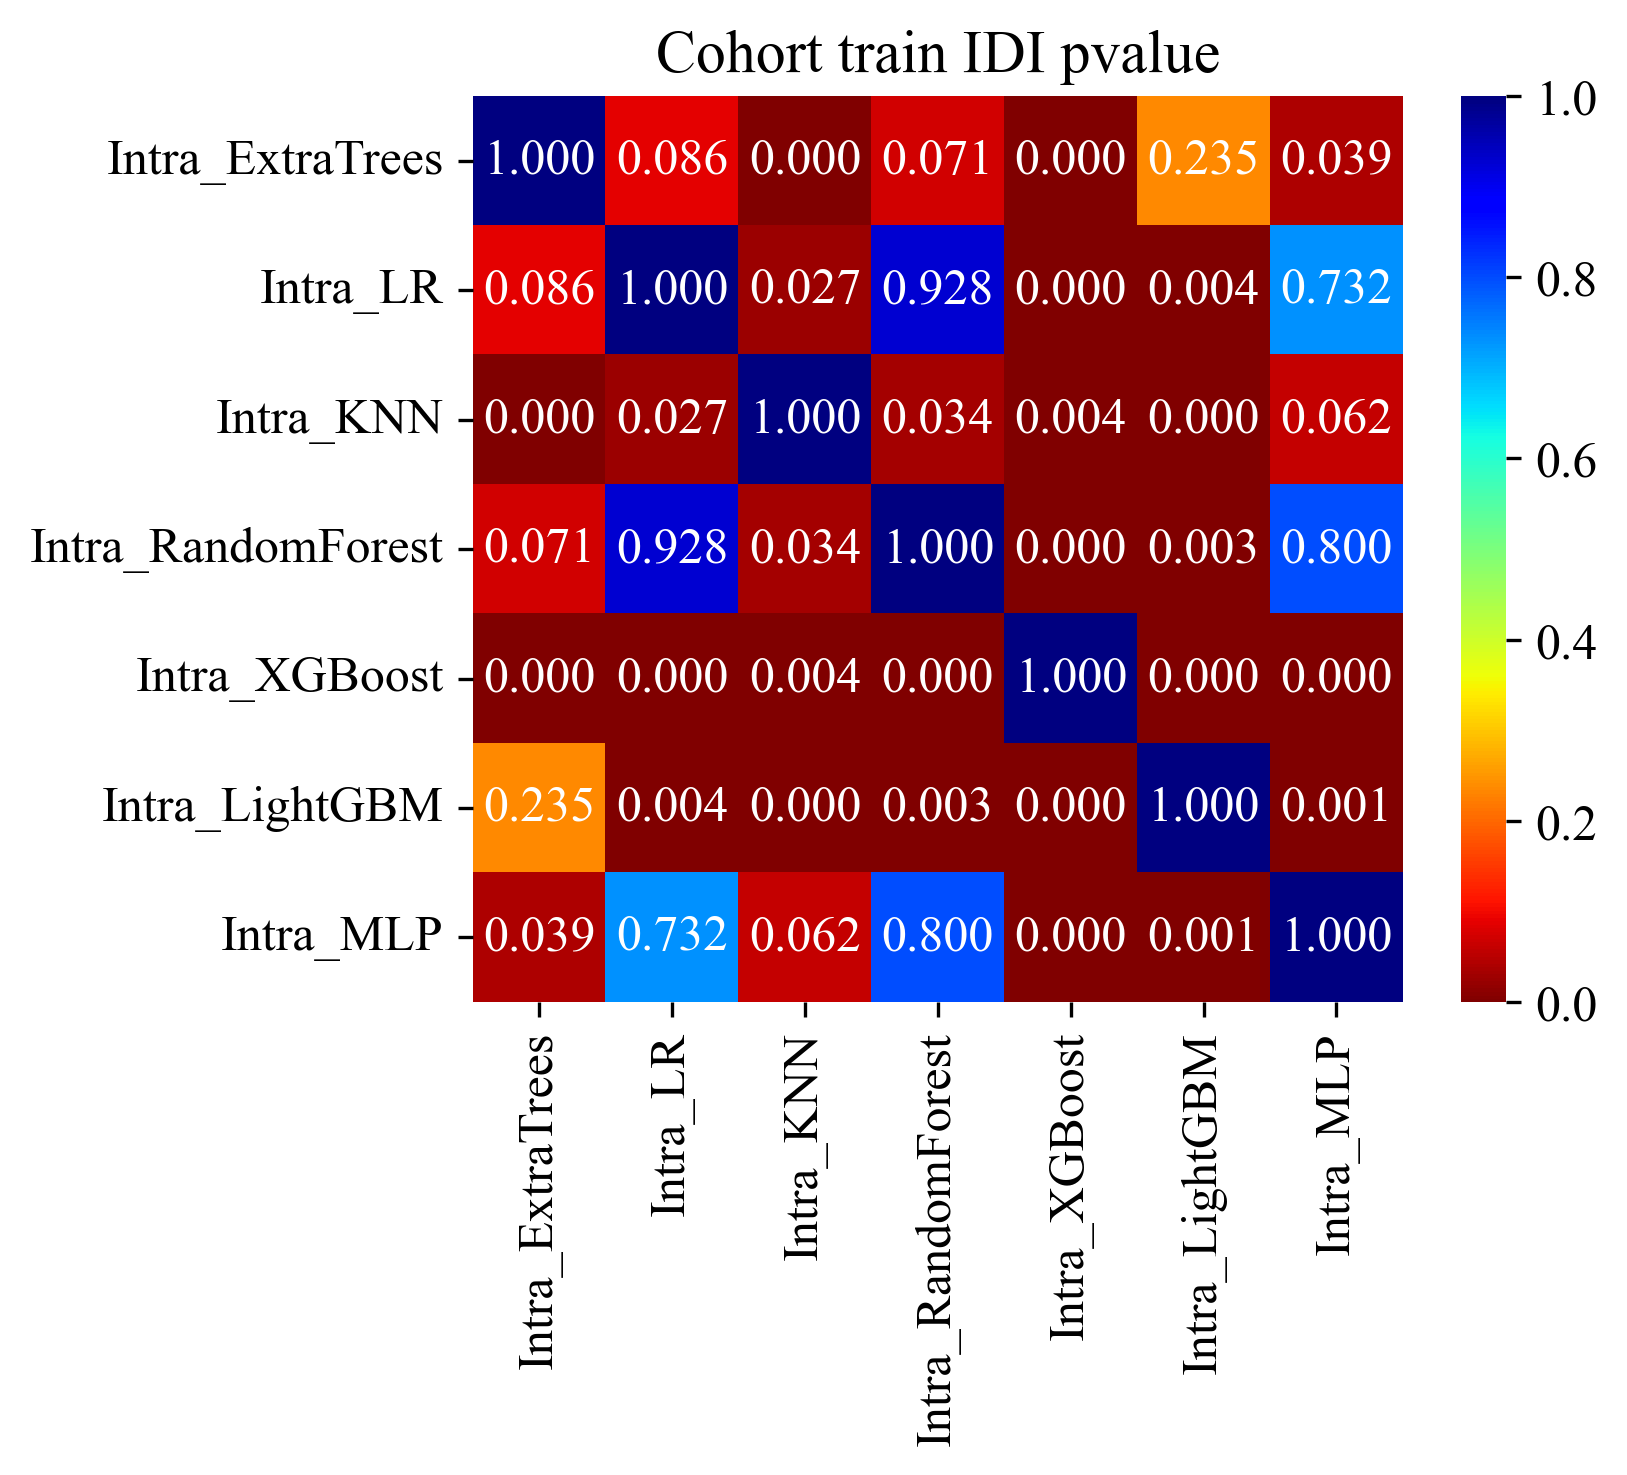

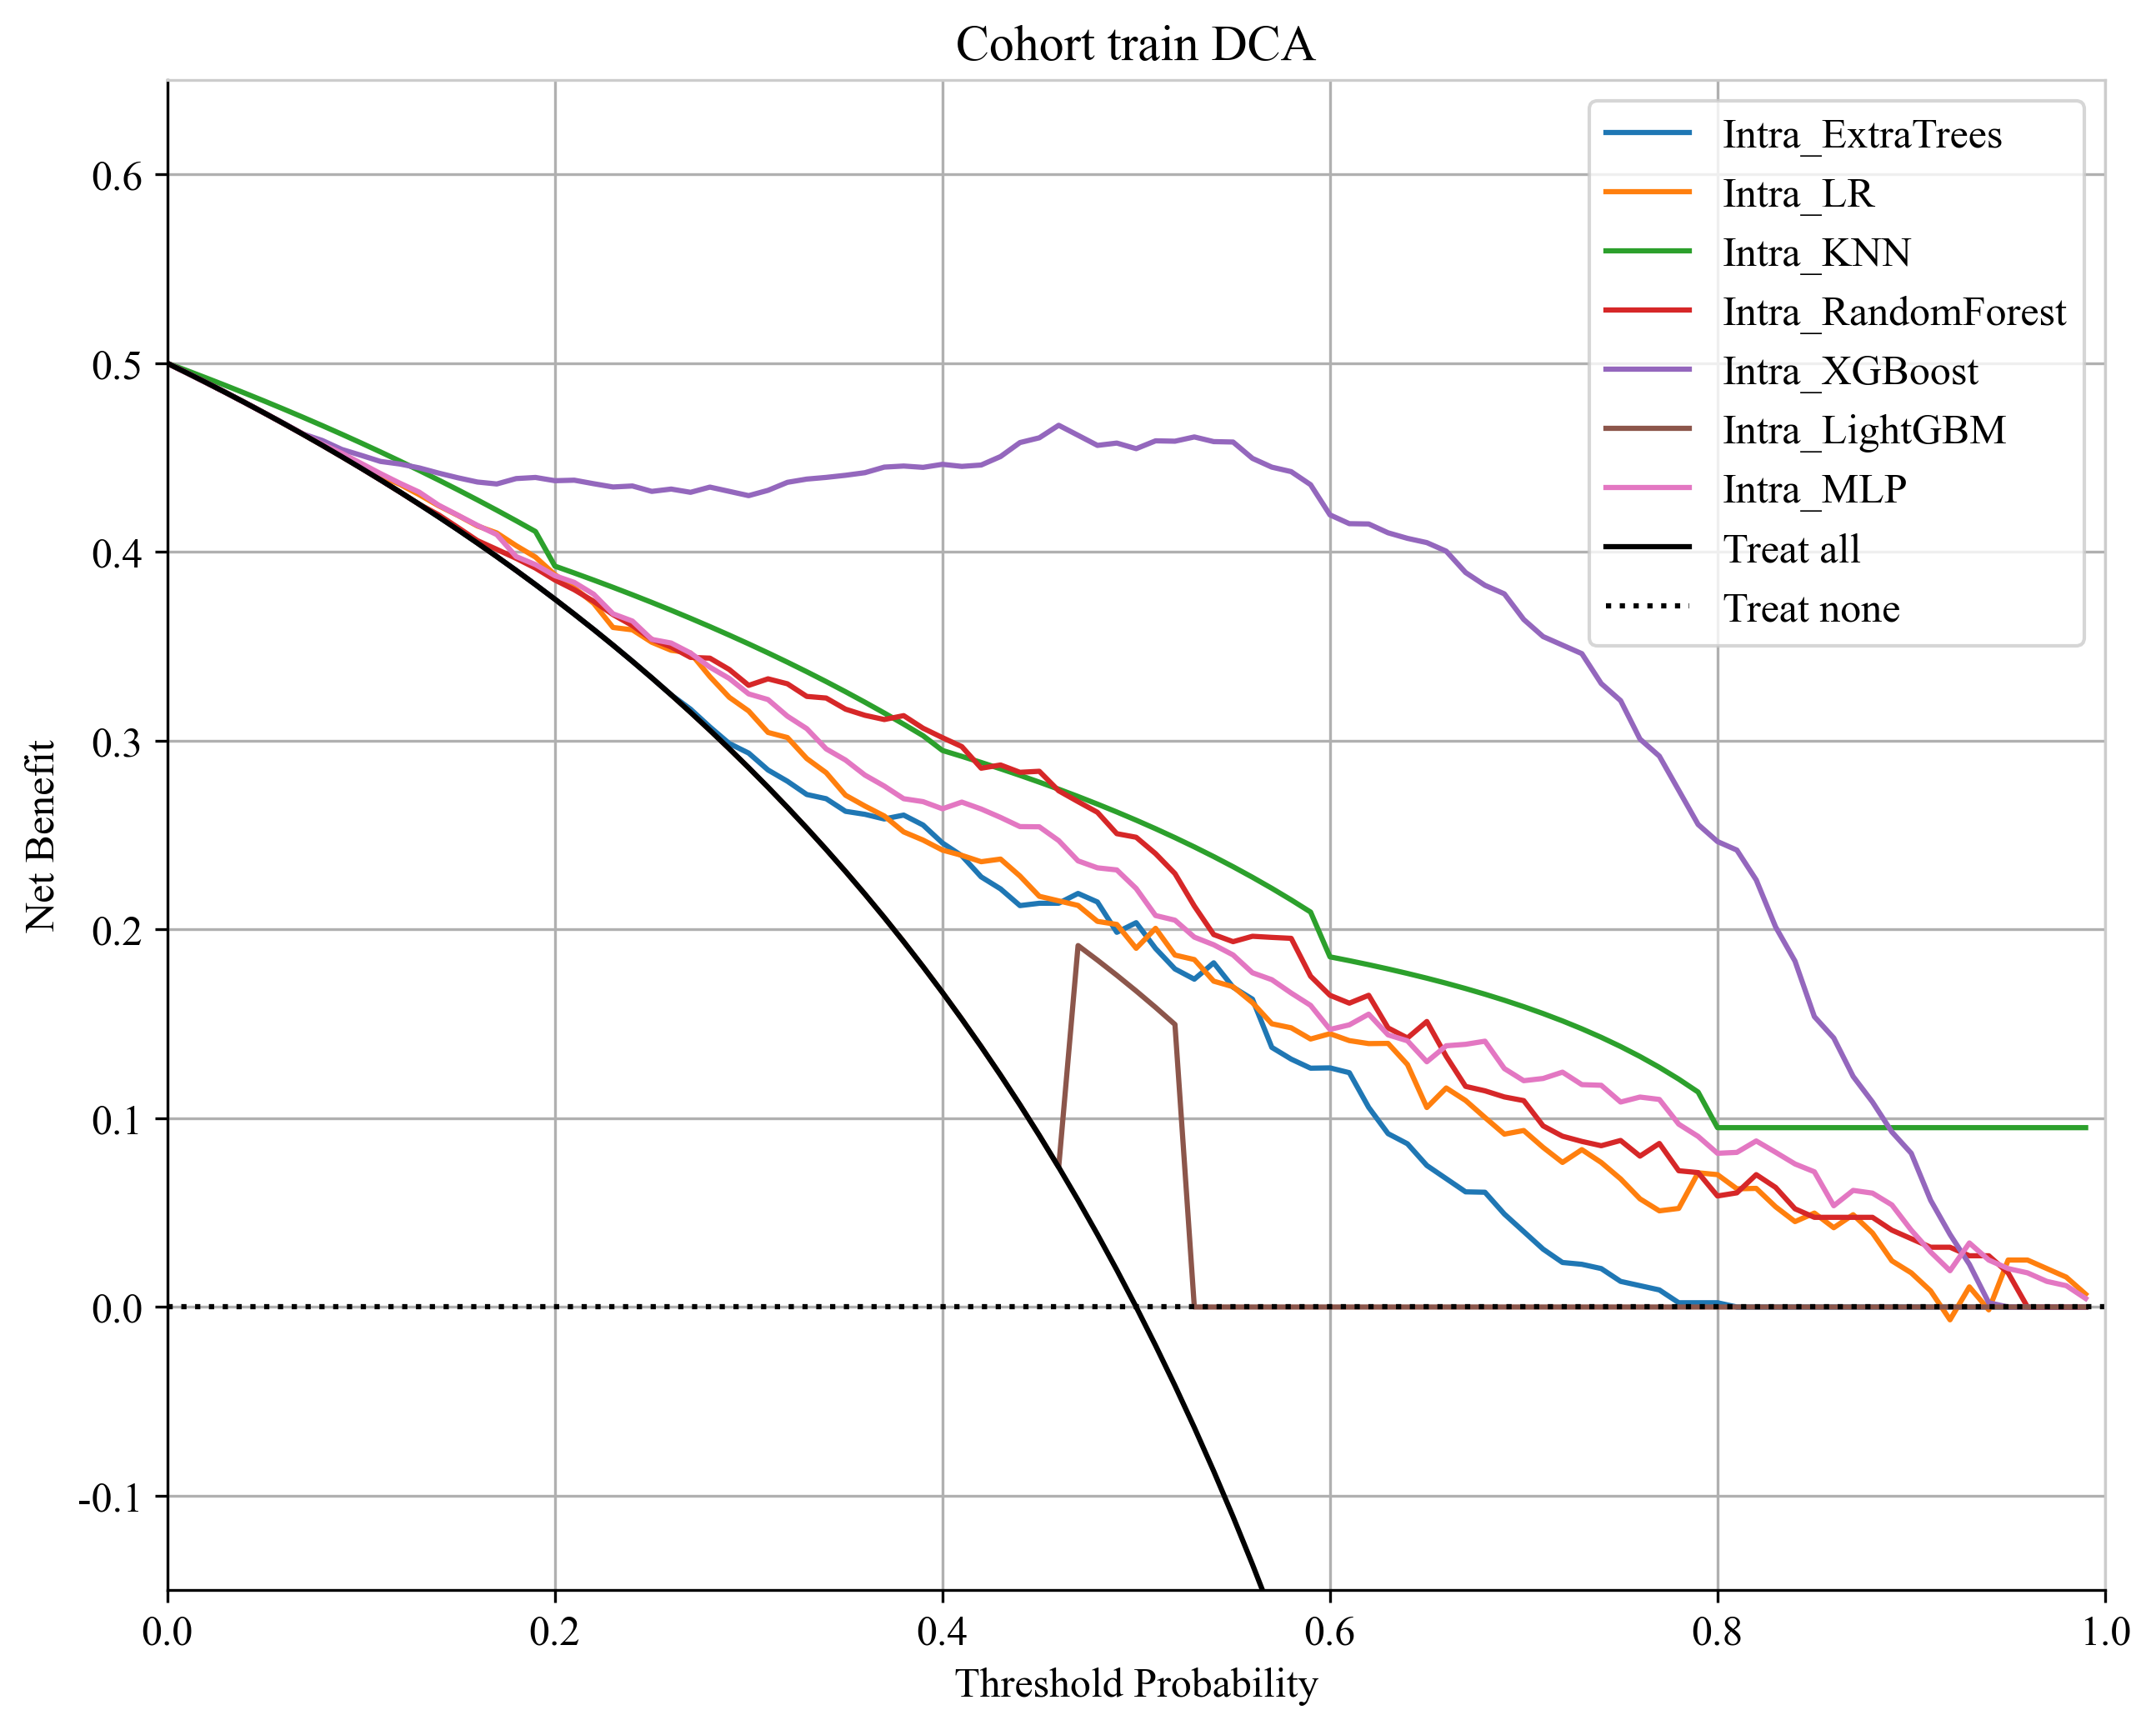

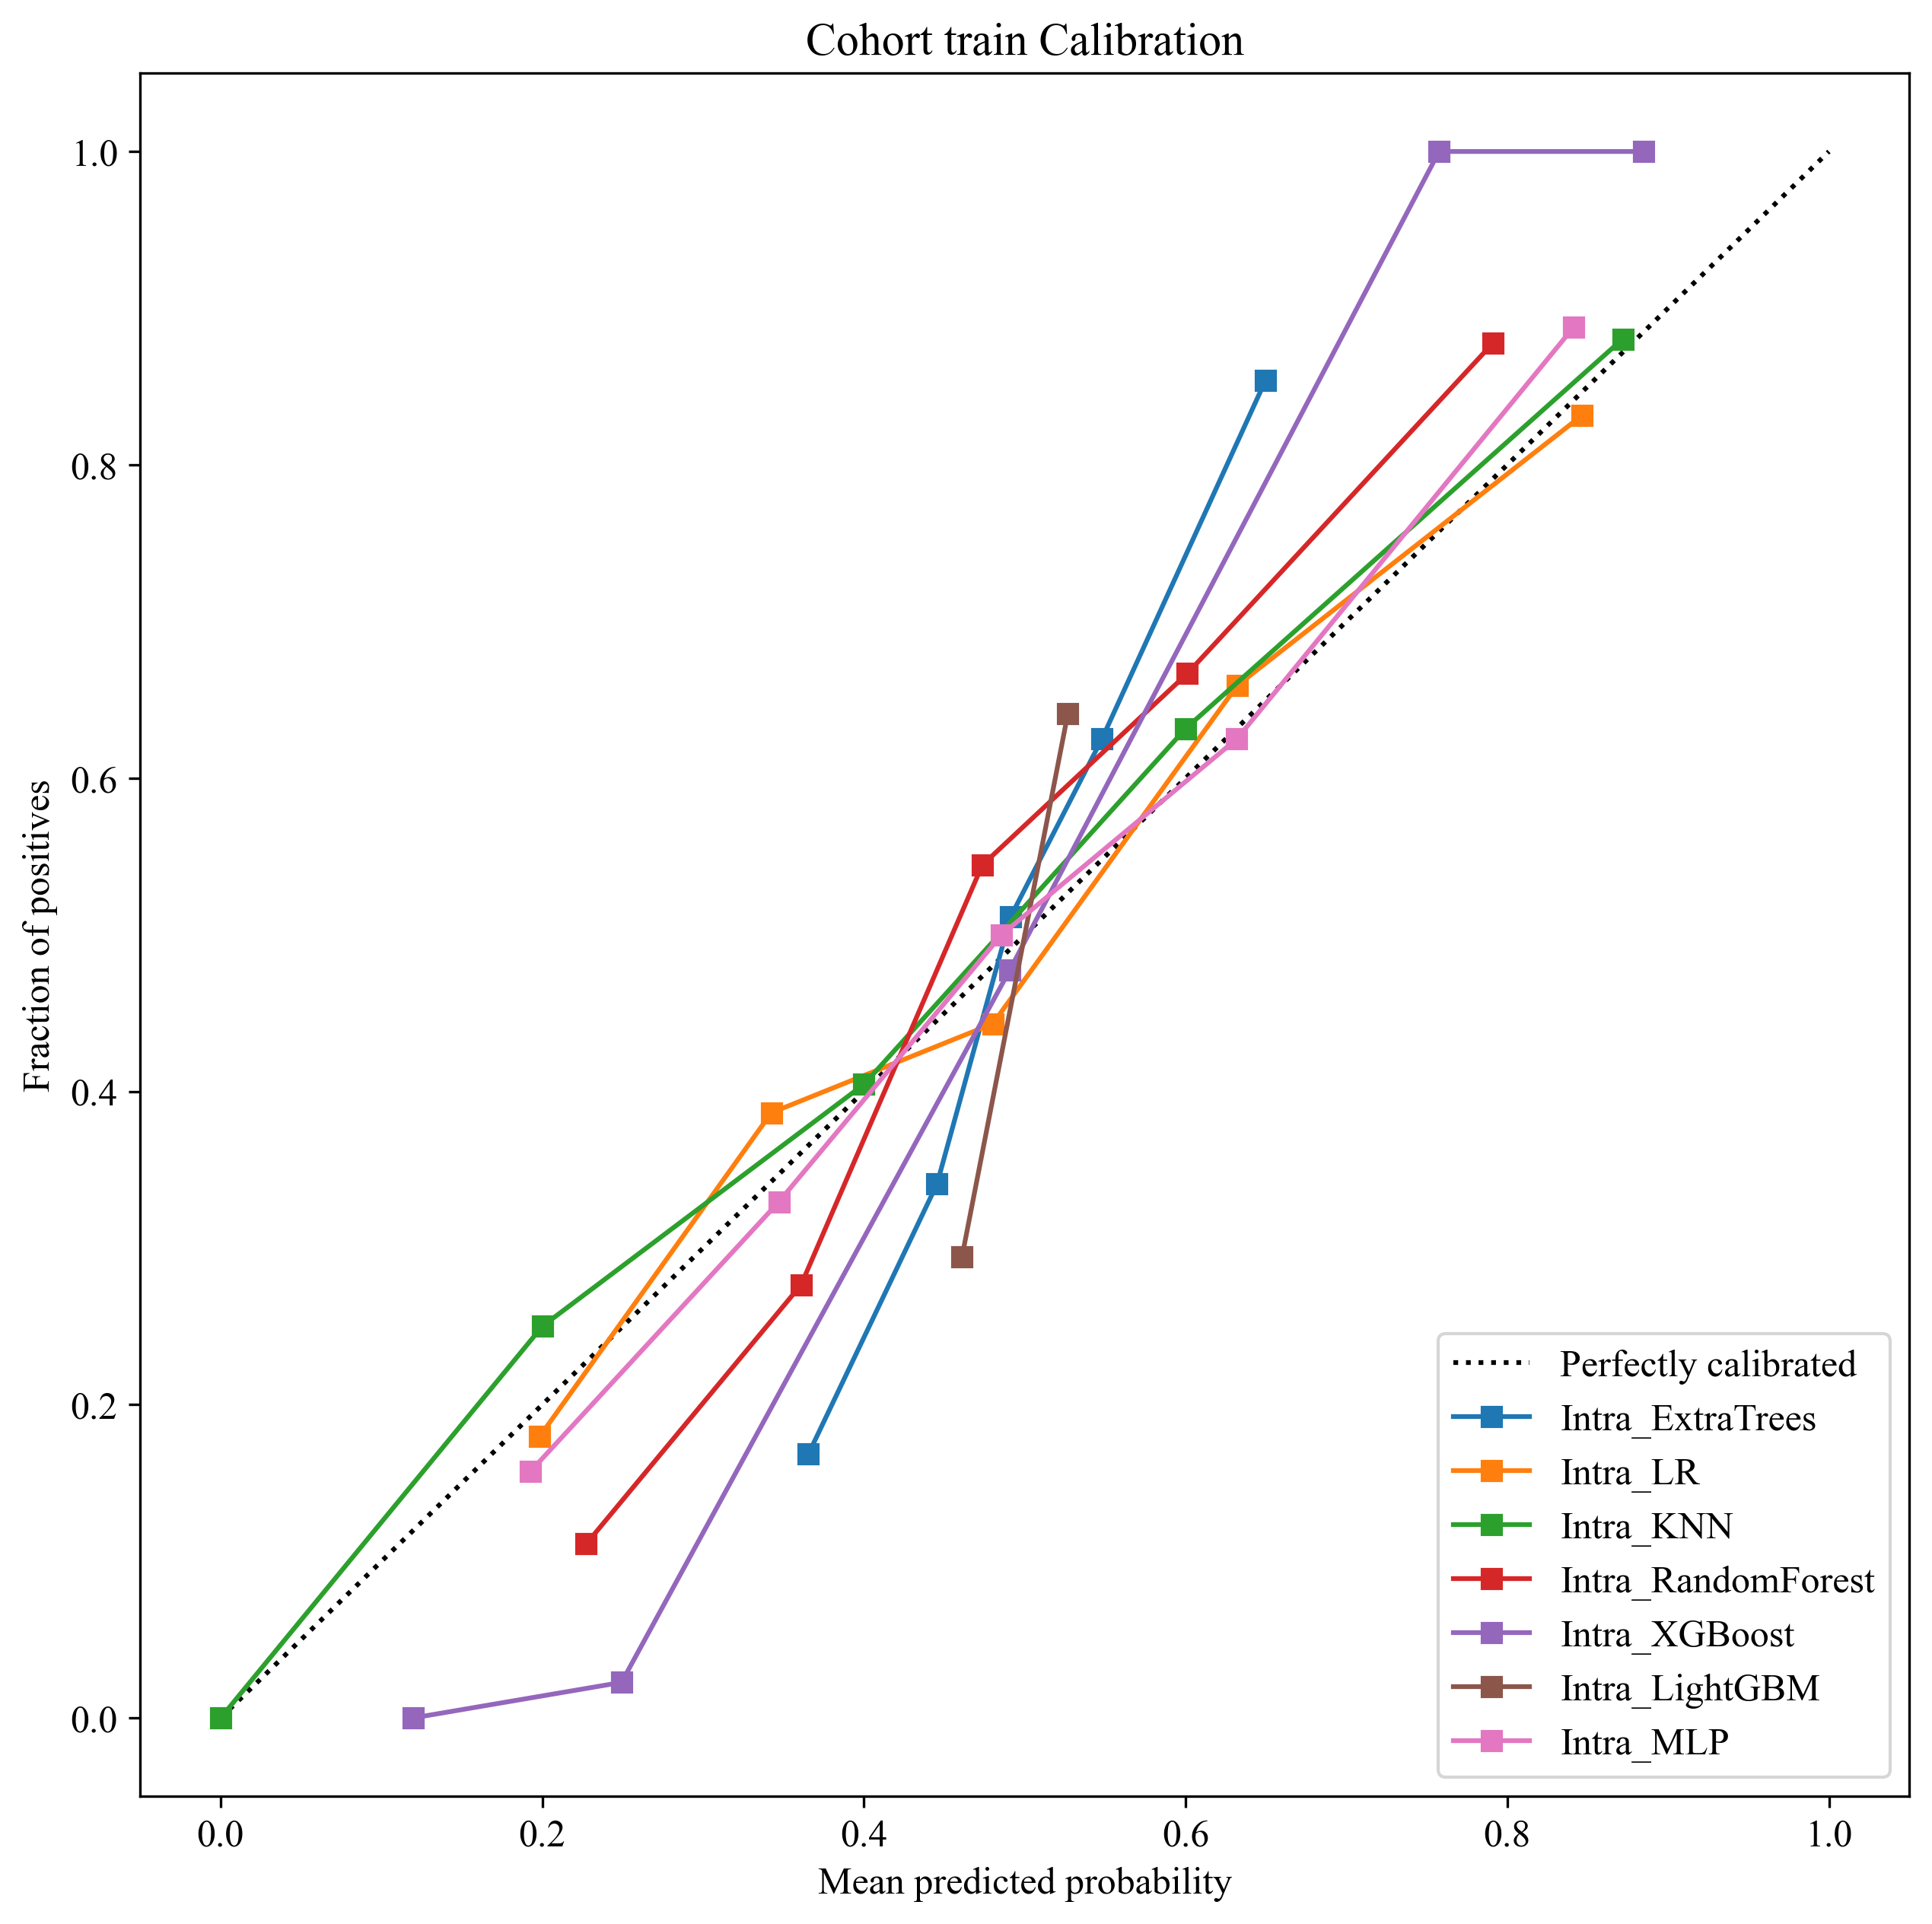

ID   -0_x  Intra_ExtraTrees   -0_y  Intra_LR  -0_x  Intra_KNN  \
0     100.nii.gz  0.583             0.417  0.441     0.559   0.6        0.4   
1     101.nii.gz  0.462             0.538  0.458     0.542   0.4        0.6   
2    1015.nii.gz  0.437             0.563  0.325     0.675   0.2        0.8   
3    1026.nii.gz  0.420             0.580  0.417     0.583   0.8        0.2   
4    1033.nii.gz  0.539             0.461  0.475     0.525   0.8        0.2   
..           ...    ...               ...    ...       ...   ...        ...   
182   903.nii.gz  0.531             0.469  0.631     0.369   0.6        0.4   
183   909.nii.gz  0.411             0.589  0.344     0.656   0.4        0.6   
184   921.nii.gz  0.567             0.433  0.731     0.269   0.6        0.4   
185   923.nii.gz  0.334             0.666  0.057     0.943   0.2        0.8   
186   926.nii.gz  0.709             0.291  0.916     0.084   0.8        0.2   

      -0_y  Intra_RandomForest   -0_x  Intra_XGBoost   -0_y  Intra_LightGBM  \
0    0.420               0.580  0.547          0.453  0.539           0.461   
1    0.299               0.701  0.450          0.550  0.473           0.527   
2    0.392               0.608  0.178          0.822  0.473           0.527   
3    0.457               0.543  0.681          0.319  0.473           0.527   
4    0.724               0.276  0.823          0.177  0.539           0.461   
..     ...                 ...    ...            ...    ...             ...   
182  0.555               0.445  0.452          0.548  0.473           0.527   
183  0.311               0.689  0.335          0.665  0.473           0.527   
184  0.681               0.319  0.761          0.239  0.539           0.461   
185  0.042               0.958  0.107          0.893  0.473           0.527   
186  0.786               0.214  0.845          0.155  0.539           0.461   

        -0  Intra_MLP  location group  label  
0    0.504      0.496         1   val      1  
1    0.475      0.525         2   val      0  
2    0.385      0.615         2   val      0  
3    0.490      0.510         1   val      1  
4    0.520      0.480         2   val      0  
..     ...        ...       ...   ...    ...  
182  0.605      0.395         1   val      1  
183  0.298      0.702         1   val      1  
184  0.733      0.267         2   val      0  
185  0.112      0.888         1   val      1  
186  0.936      0.064         2   val      0  

[187 rows x 18 columns]

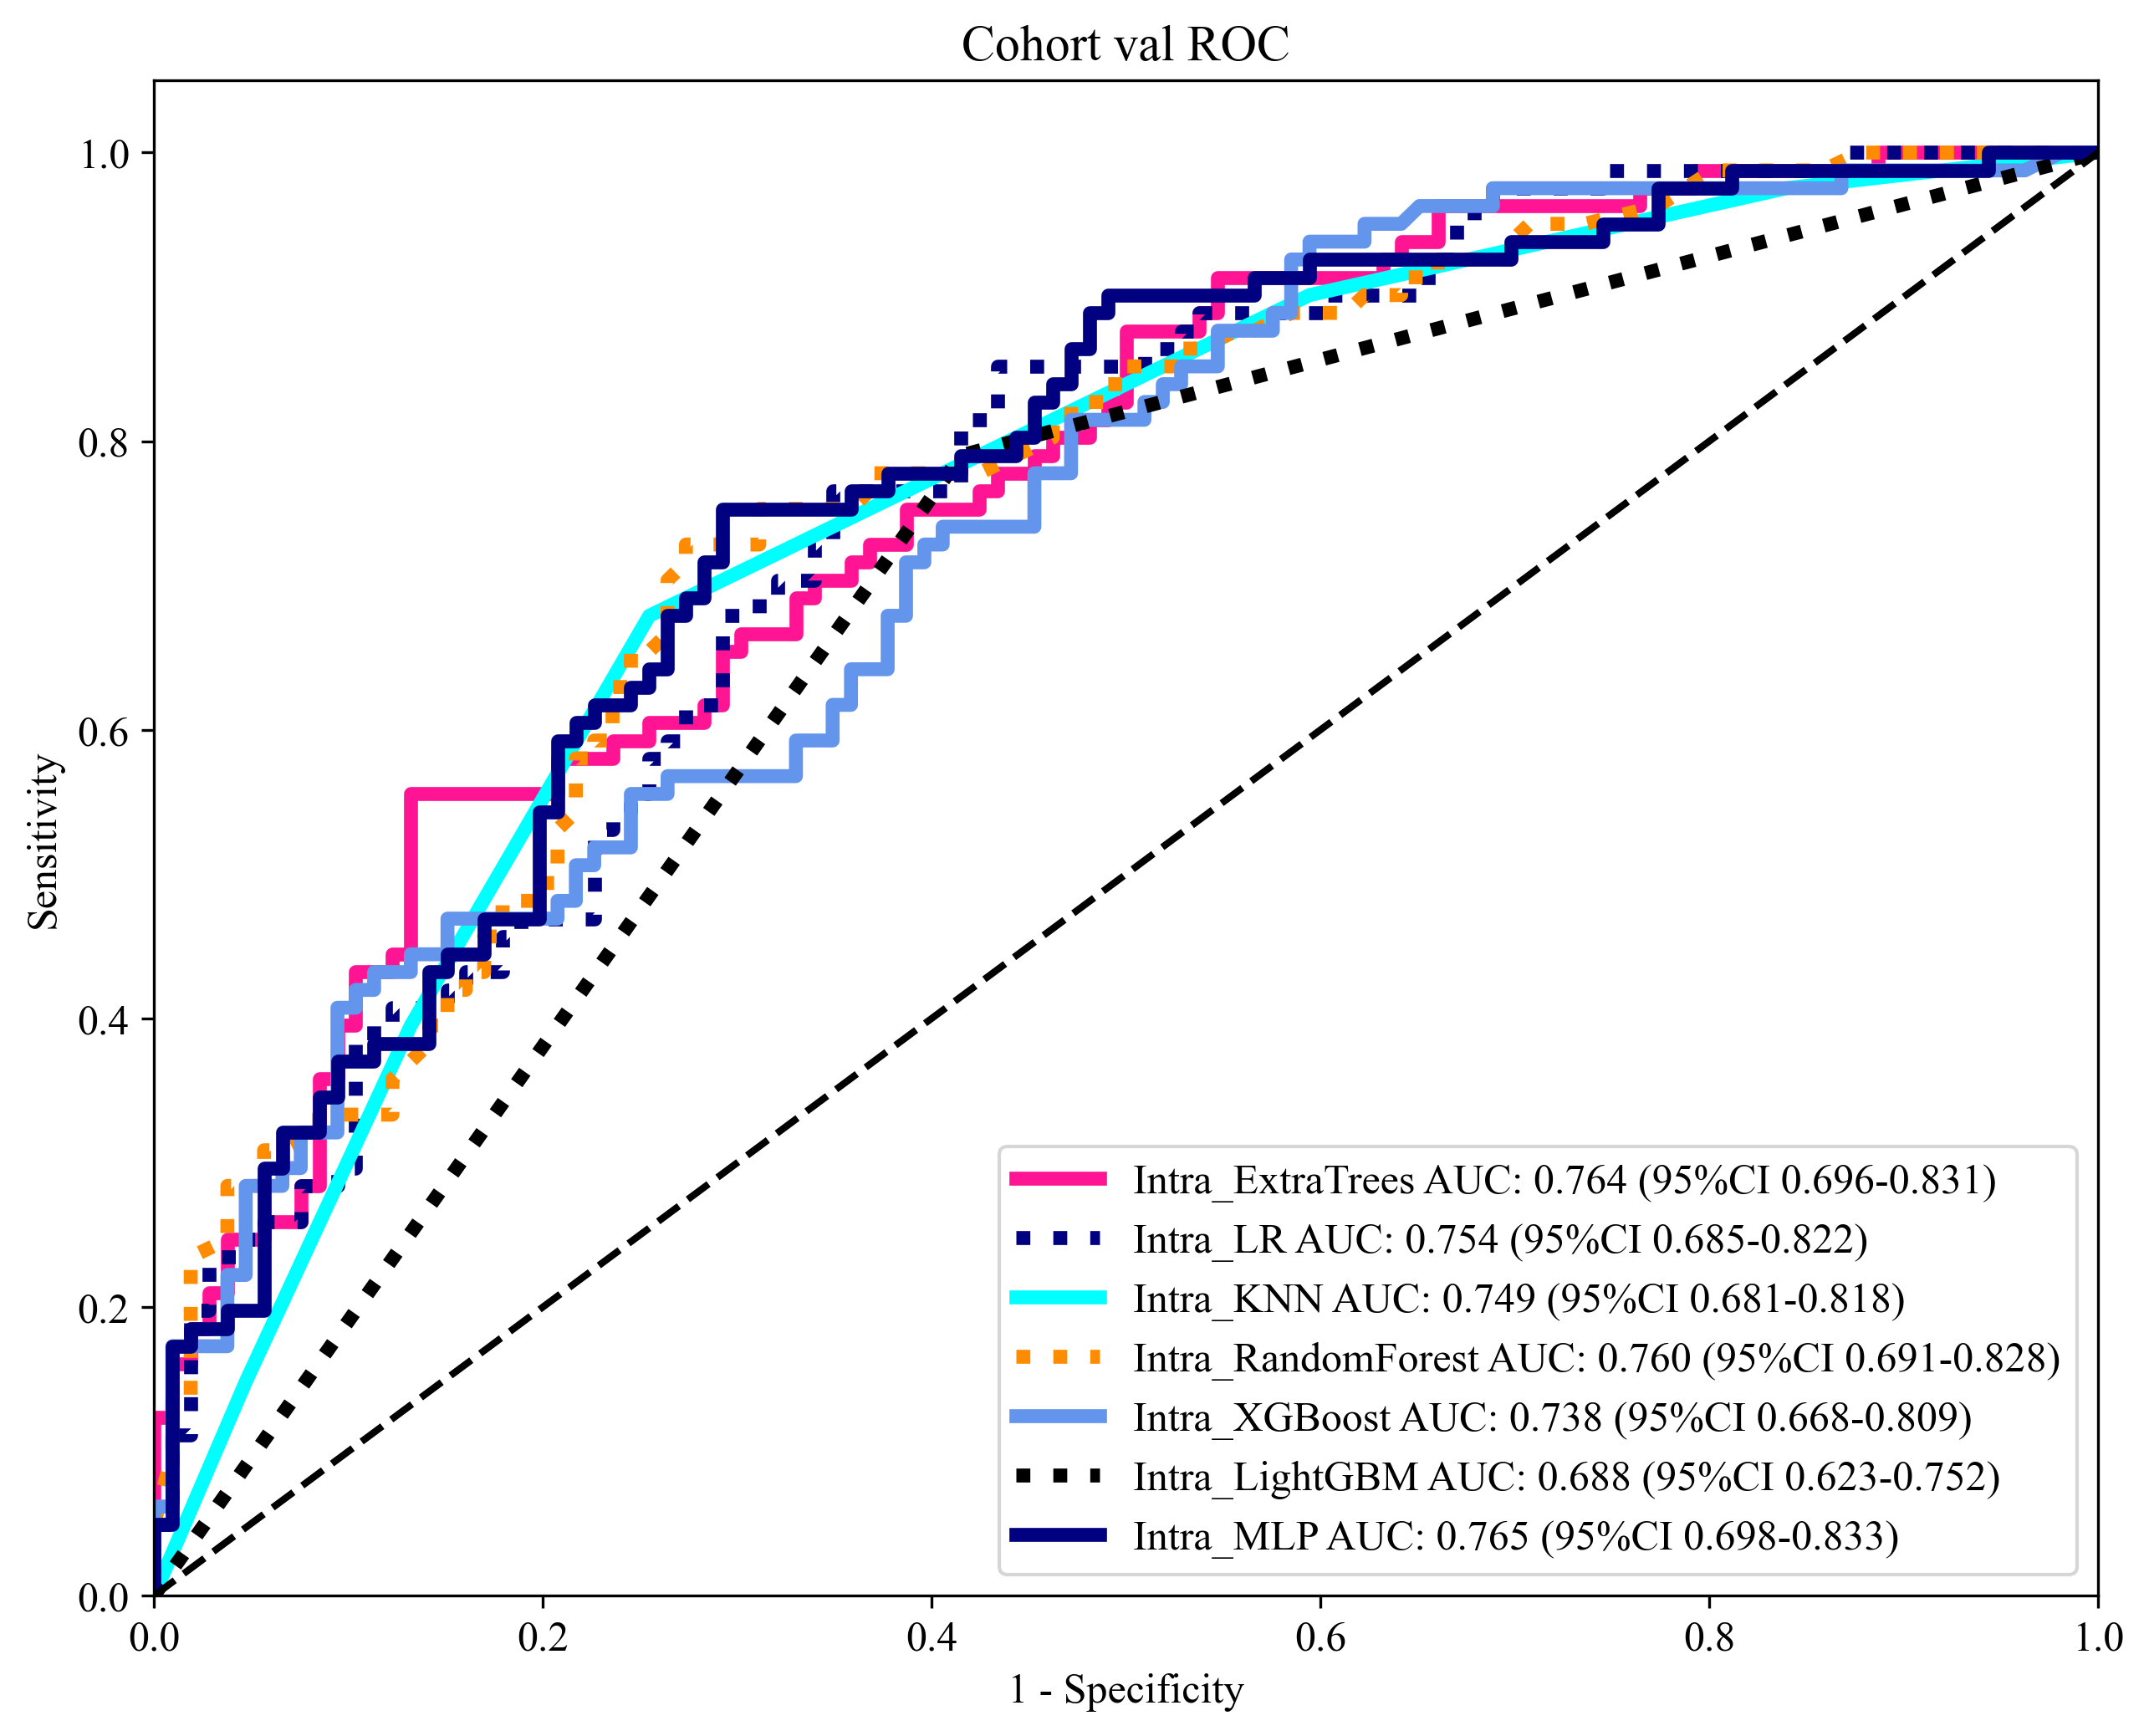

Signature  Accuracy    AUC           95% CI  Sensitivity  \
0     Intra_ExtraTrees     0.708  0.784  0.7429 - 0.8258        0.747   
1             Intra_LR     0.708  0.764  0.7206 - 0.8077        0.670   
2            Intra_KNN     0.758  0.836  0.8010 - 0.8712        0.738   
3   Intra_RandomForest     0.762  0.824  0.7862 - 0.8628        0.814   
4        Intra_XGBoost     0.964  0.992  0.9870 - 0.9980        0.973   
5       Intra_LightGBM     0.667  0.667  0.6243 - 0.7106        0.760   
6            Intra_MLP     0.729  0.793  0.7521 - 0.8340        0.729   
7     Intra_ExtraTrees     0.733  0.764  0.6962 - 0.8311        0.556   
8             Intra_LR     0.690  0.754  0.6851 - 0.8220        0.852   
9            Intra_KNN     0.717  0.749  0.6806 - 0.8180        0.679   
10  Intra_RandomForest     0.727  0.760  0.6913 - 0.8281        0.728   
11       Intra_XGBoost     0.636  0.738  0.6681 - 0.8088        0.938   
12      Intra_LightGBM     0.674  0.688  0.6226 - 0.7524        0.790   
13           Intra_MLP     0.727  0.765  0.6976 - 0.8333        0.753   

    Specificity    PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0         0.670  0.693  0.725      0.693   0.747  0.719      0.482  train  
1         0.747  0.725  0.693      0.725   0.670  0.696      0.511  train  
2         0.778  0.769  0.748      0.769   0.738  0.753      0.600  train  
3         0.710  0.738  0.793      0.738   0.814  0.774      0.446  train  
4         0.955  0.956  0.972      0.956   0.973  0.964      0.467  train  
5         0.575  0.641  0.706      0.641   0.760  0.696      0.527  train  
6         0.729  0.729  0.729      0.729   0.729  0.729      0.488  train  
7         0.868  0.763  0.719      0.763   0.556  0.643      0.545    val  
8         0.566  0.600  0.833      0.600   0.852  0.704      0.427    val  
9         0.745  0.671  0.752      0.671   0.679  0.675      0.600    val  
10        0.726  0.670  0.778      0.670   0.728  0.698      0.500    val  
11        0.406  0.547  0.896      0.547   0.938  0.691      0.272    val  
12        0.585  0.593  0.785      0.593   0.790  0.677      0.527    val  
13        0.708  0.663  0.789      0.663   0.753  0.705      0.496    val

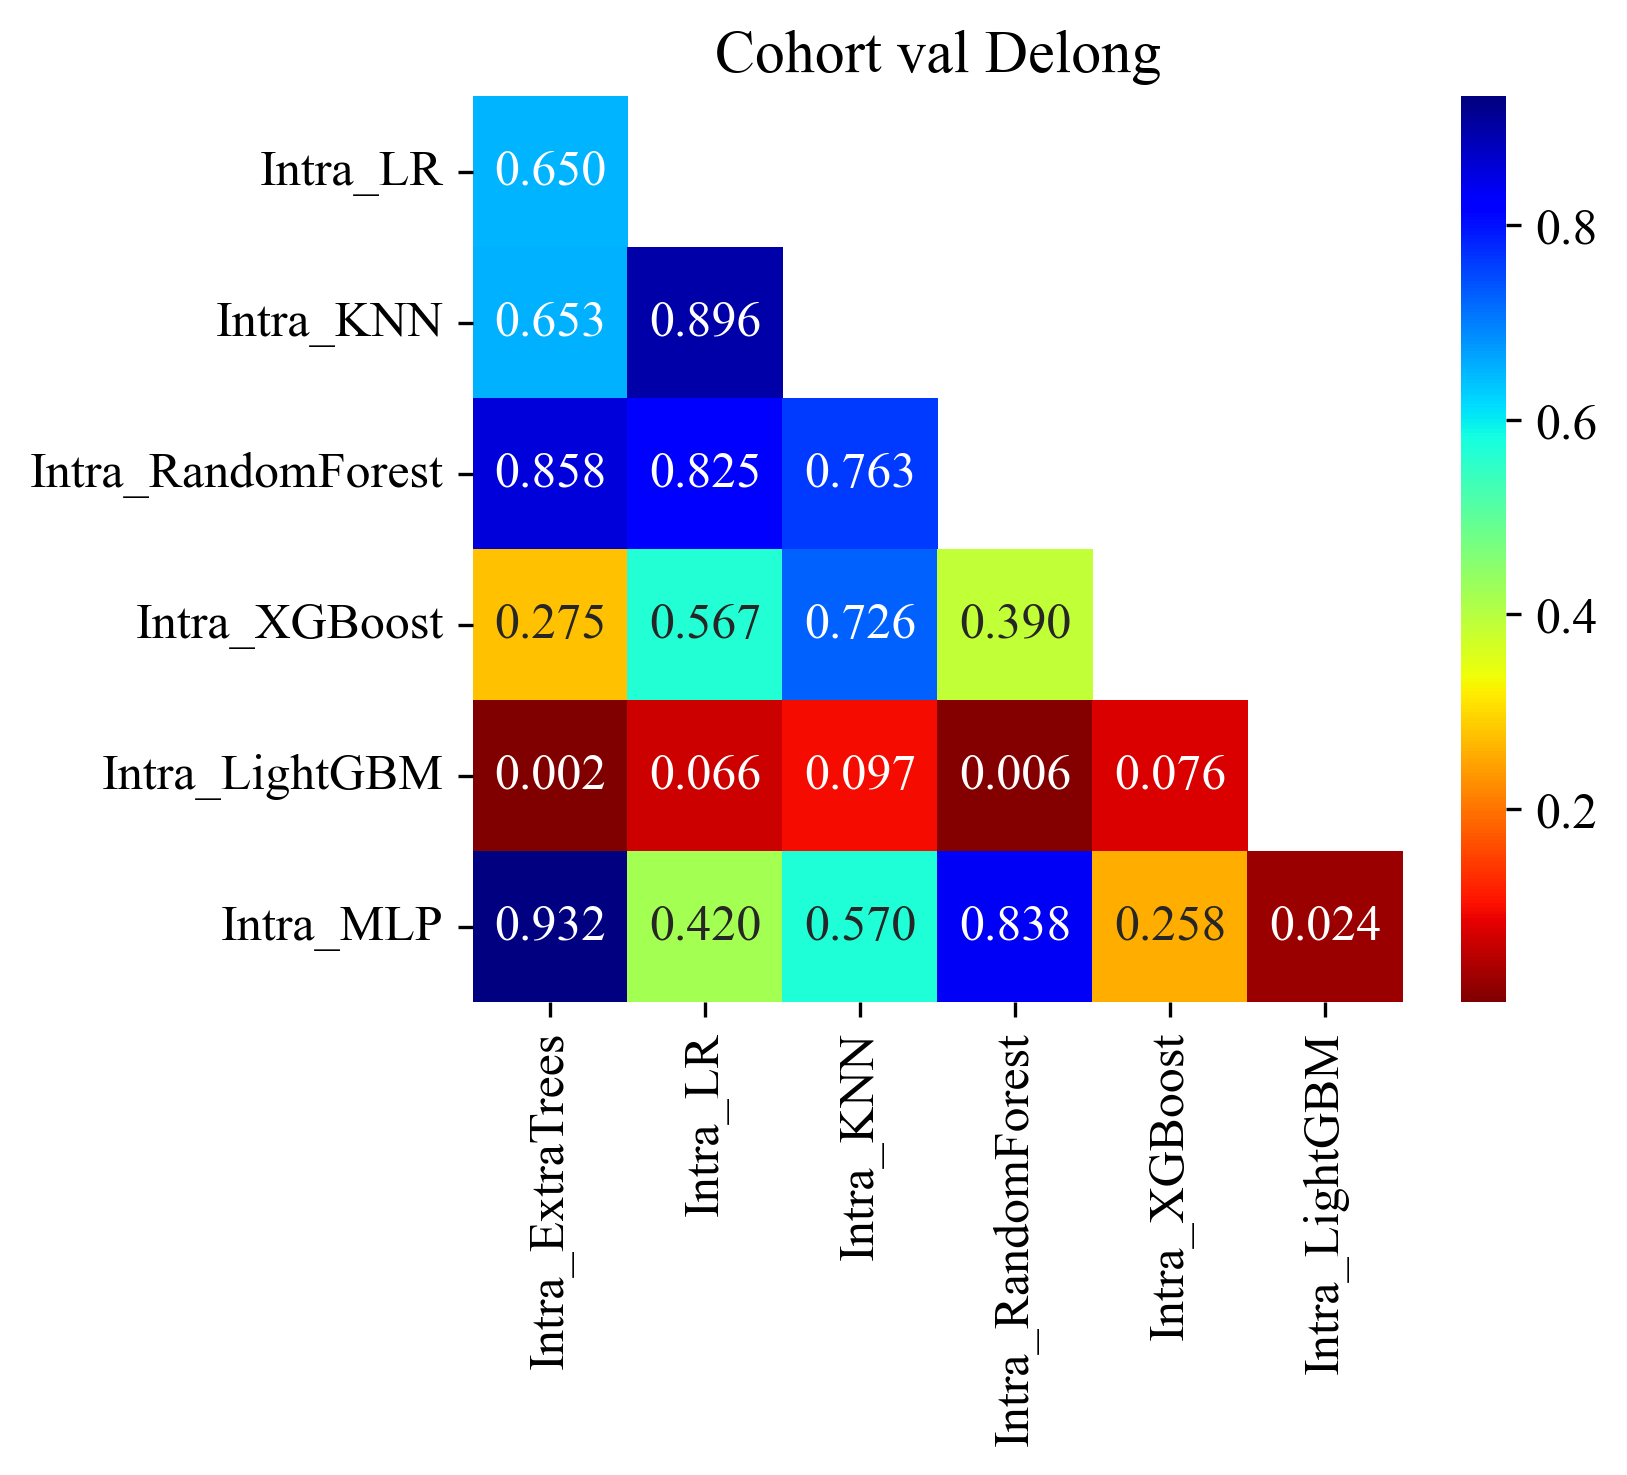

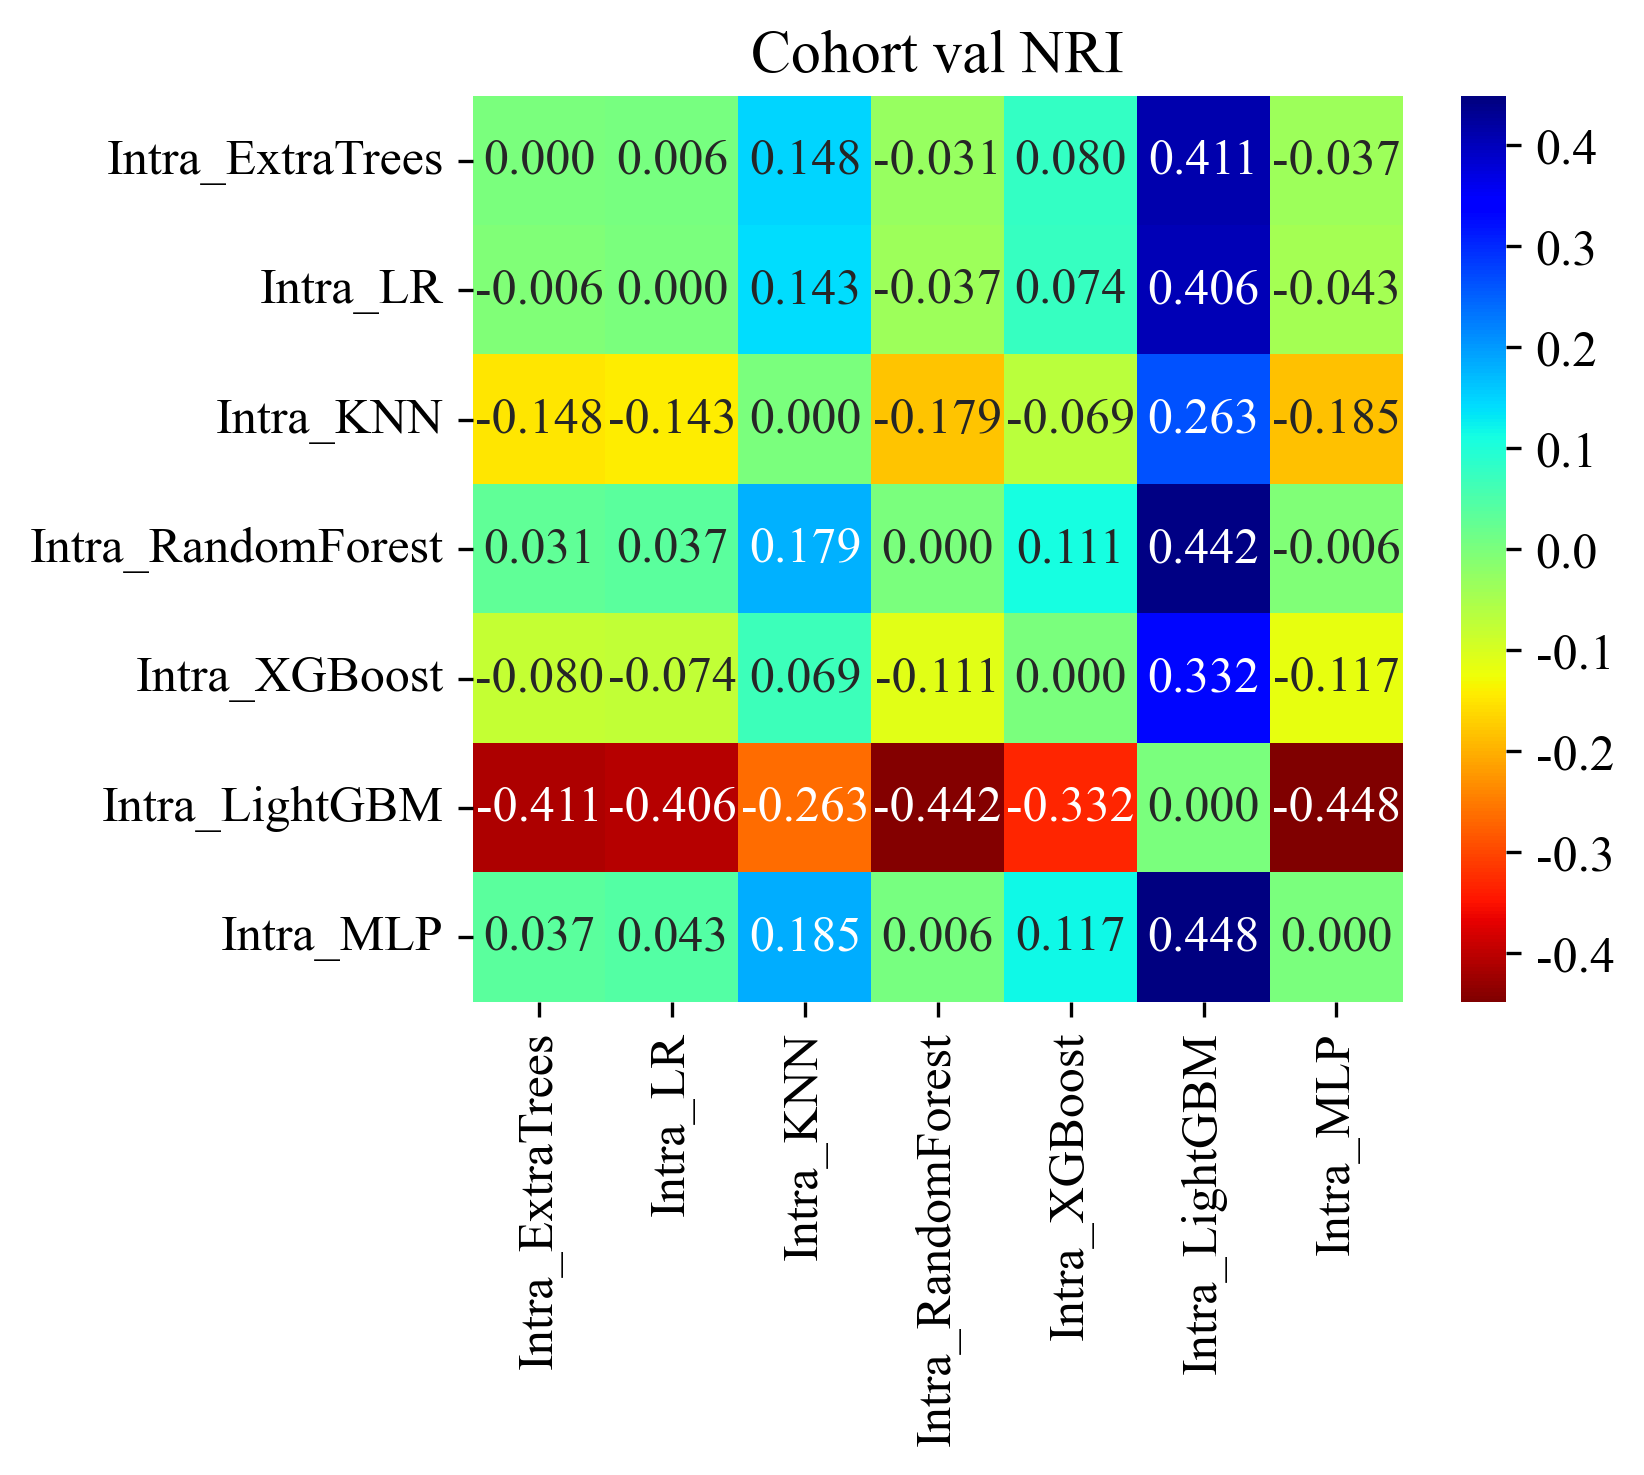

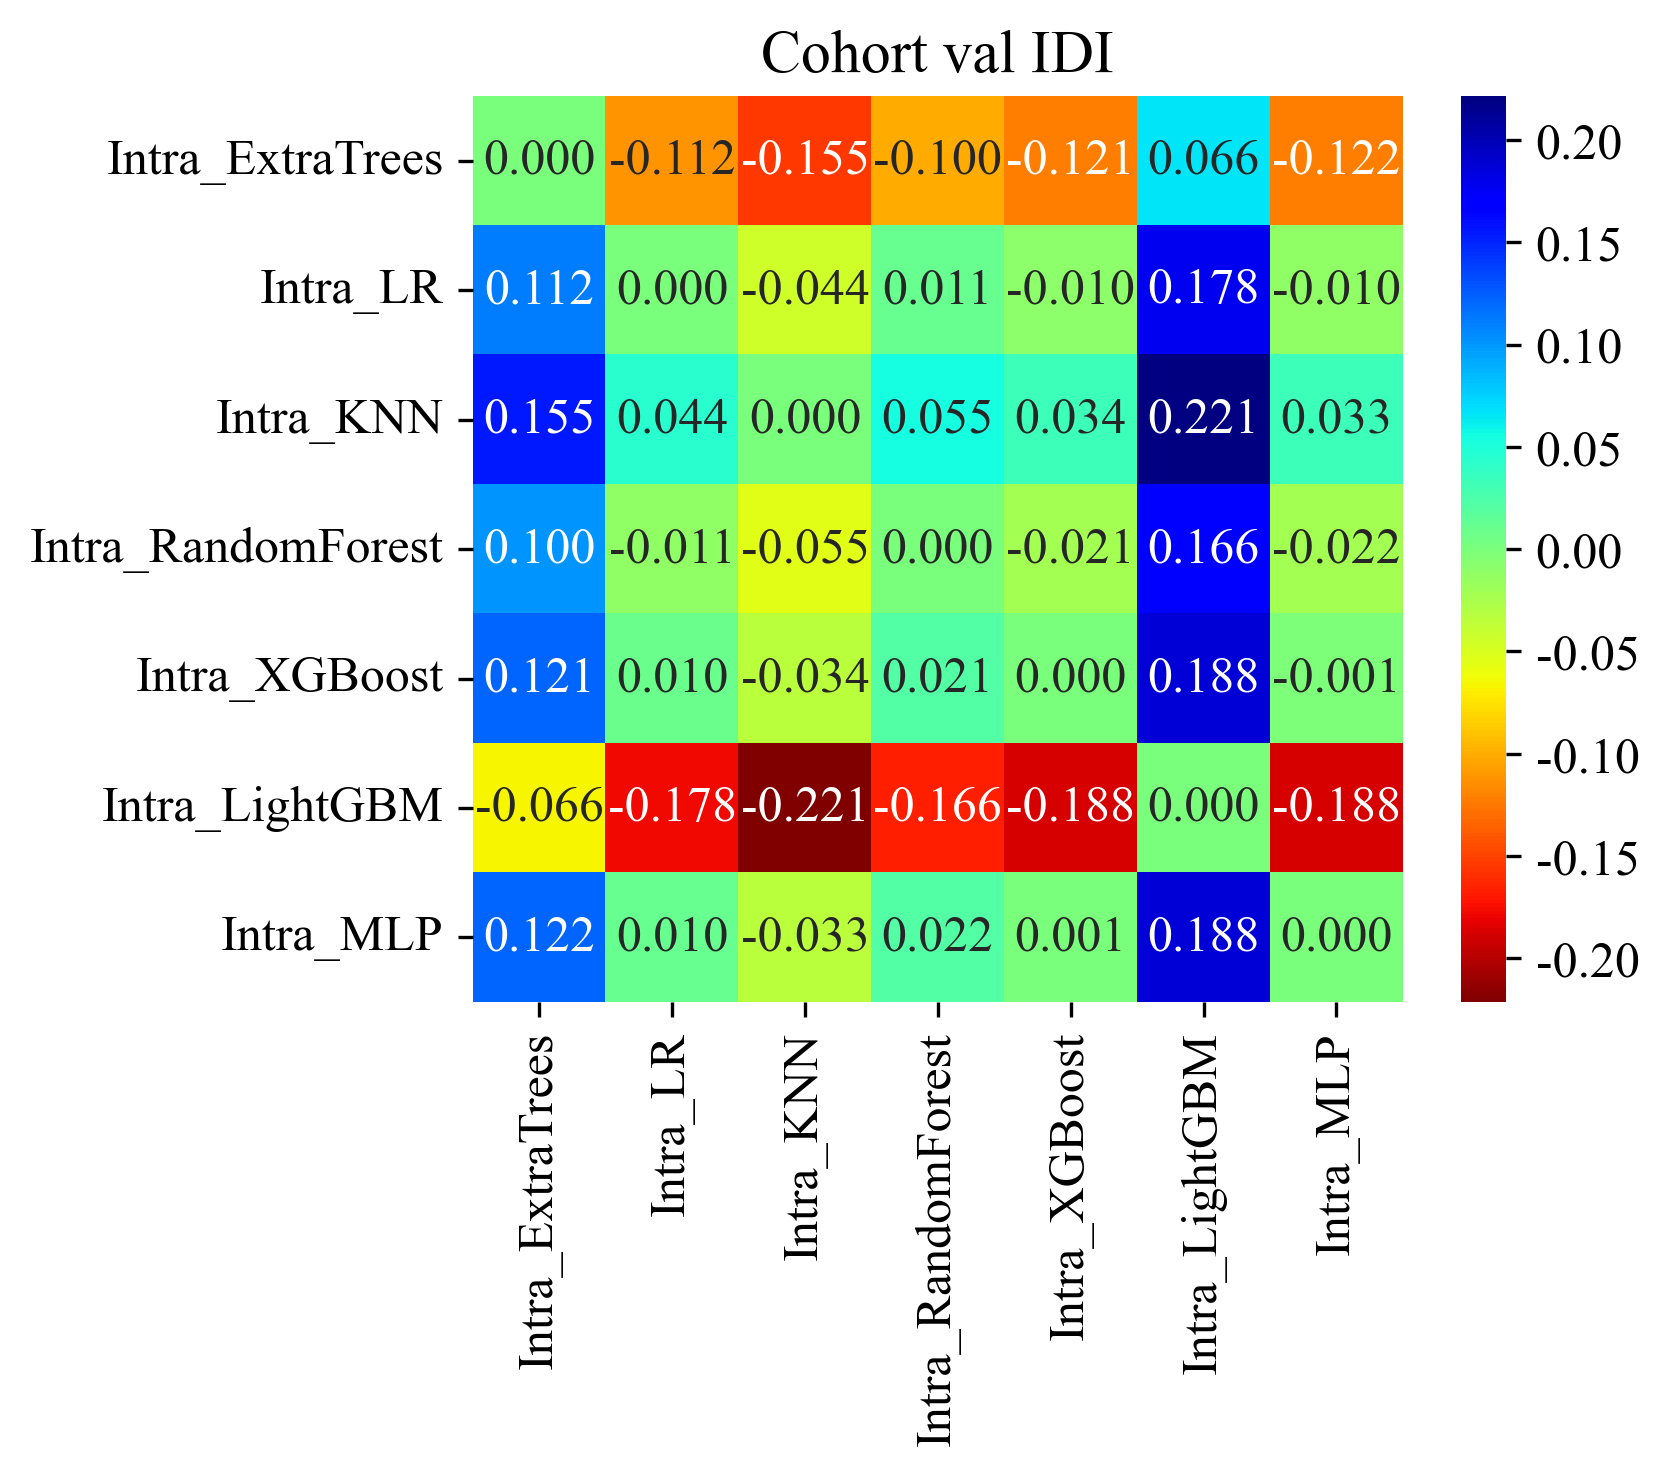

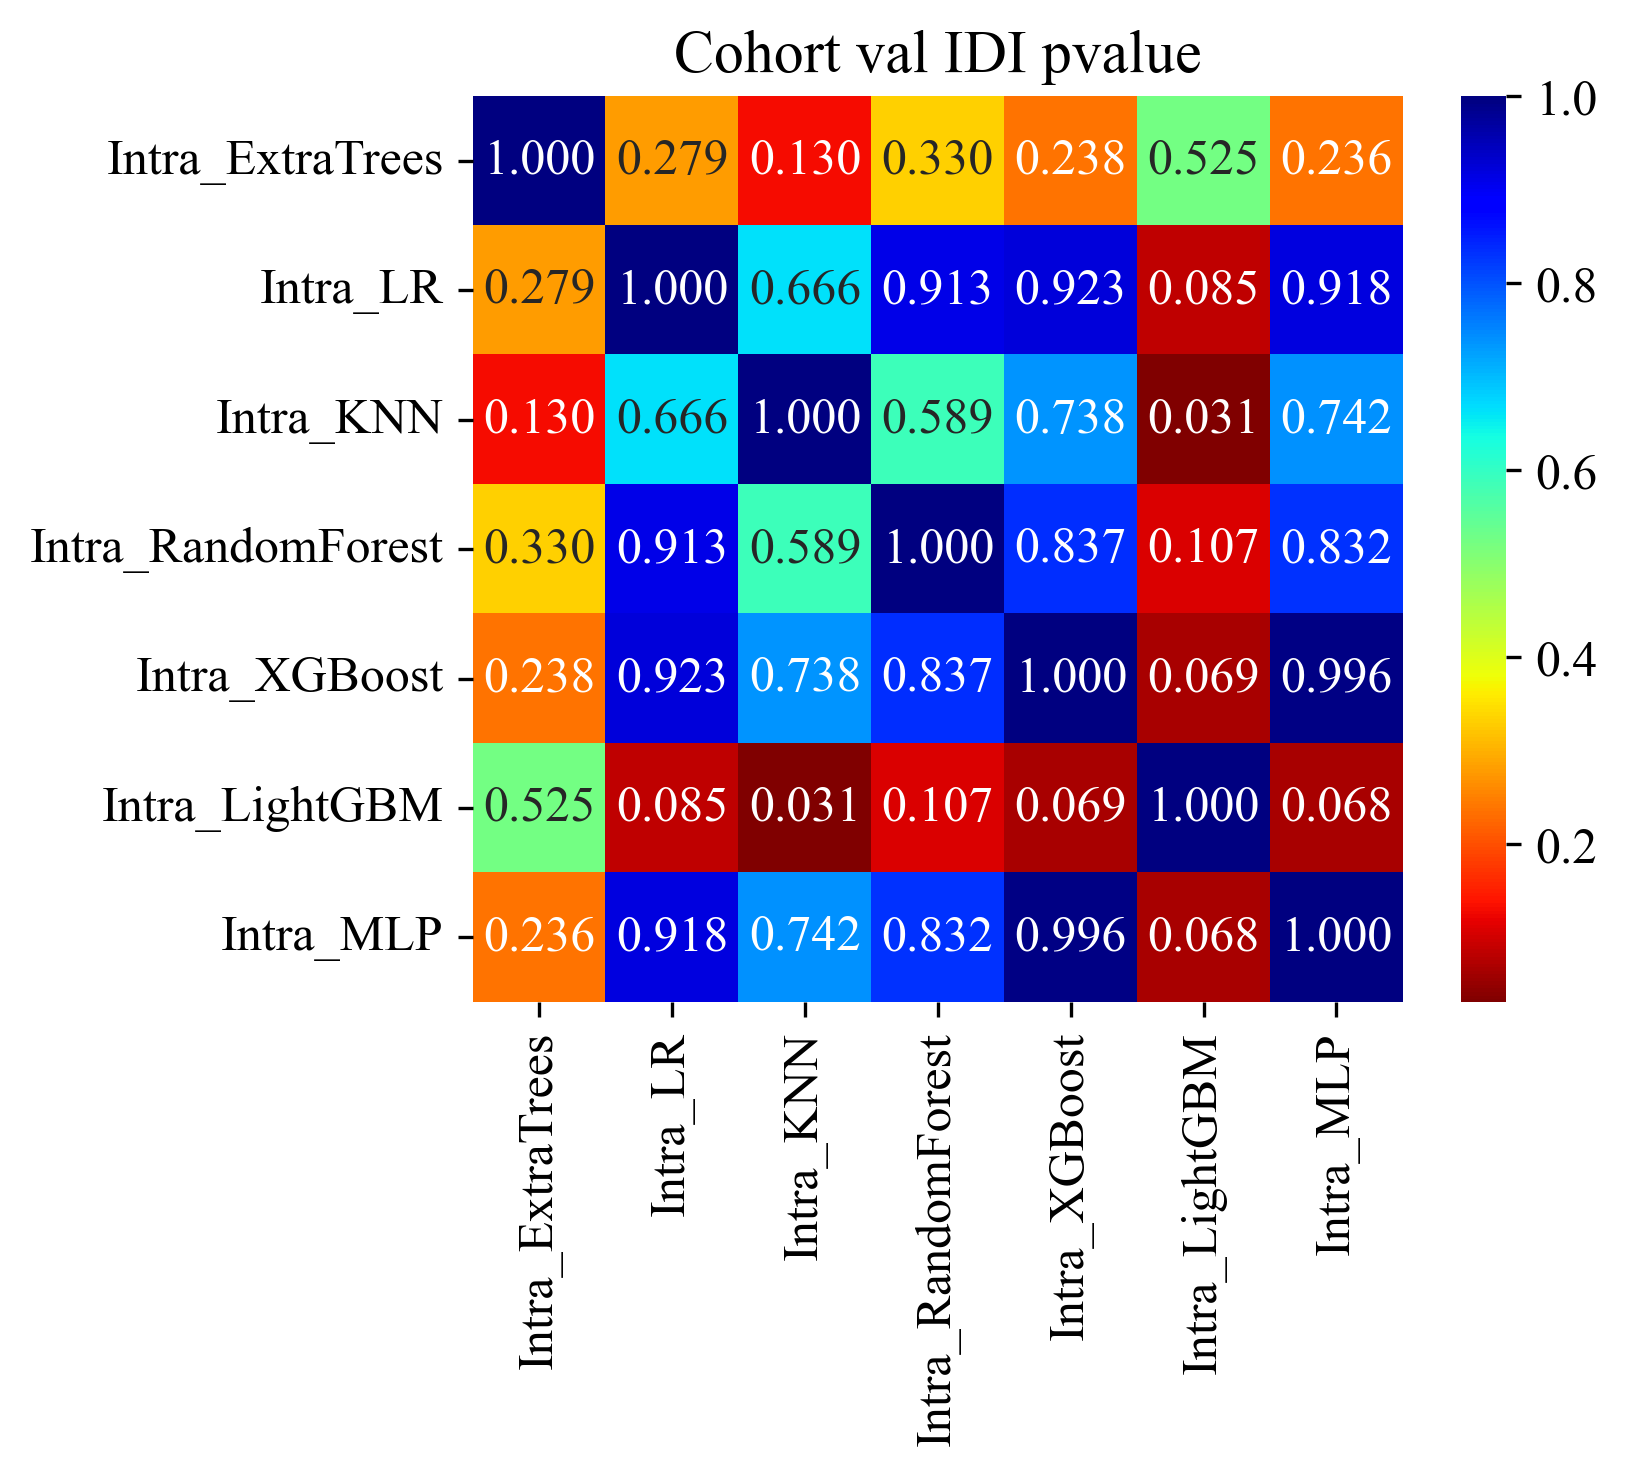

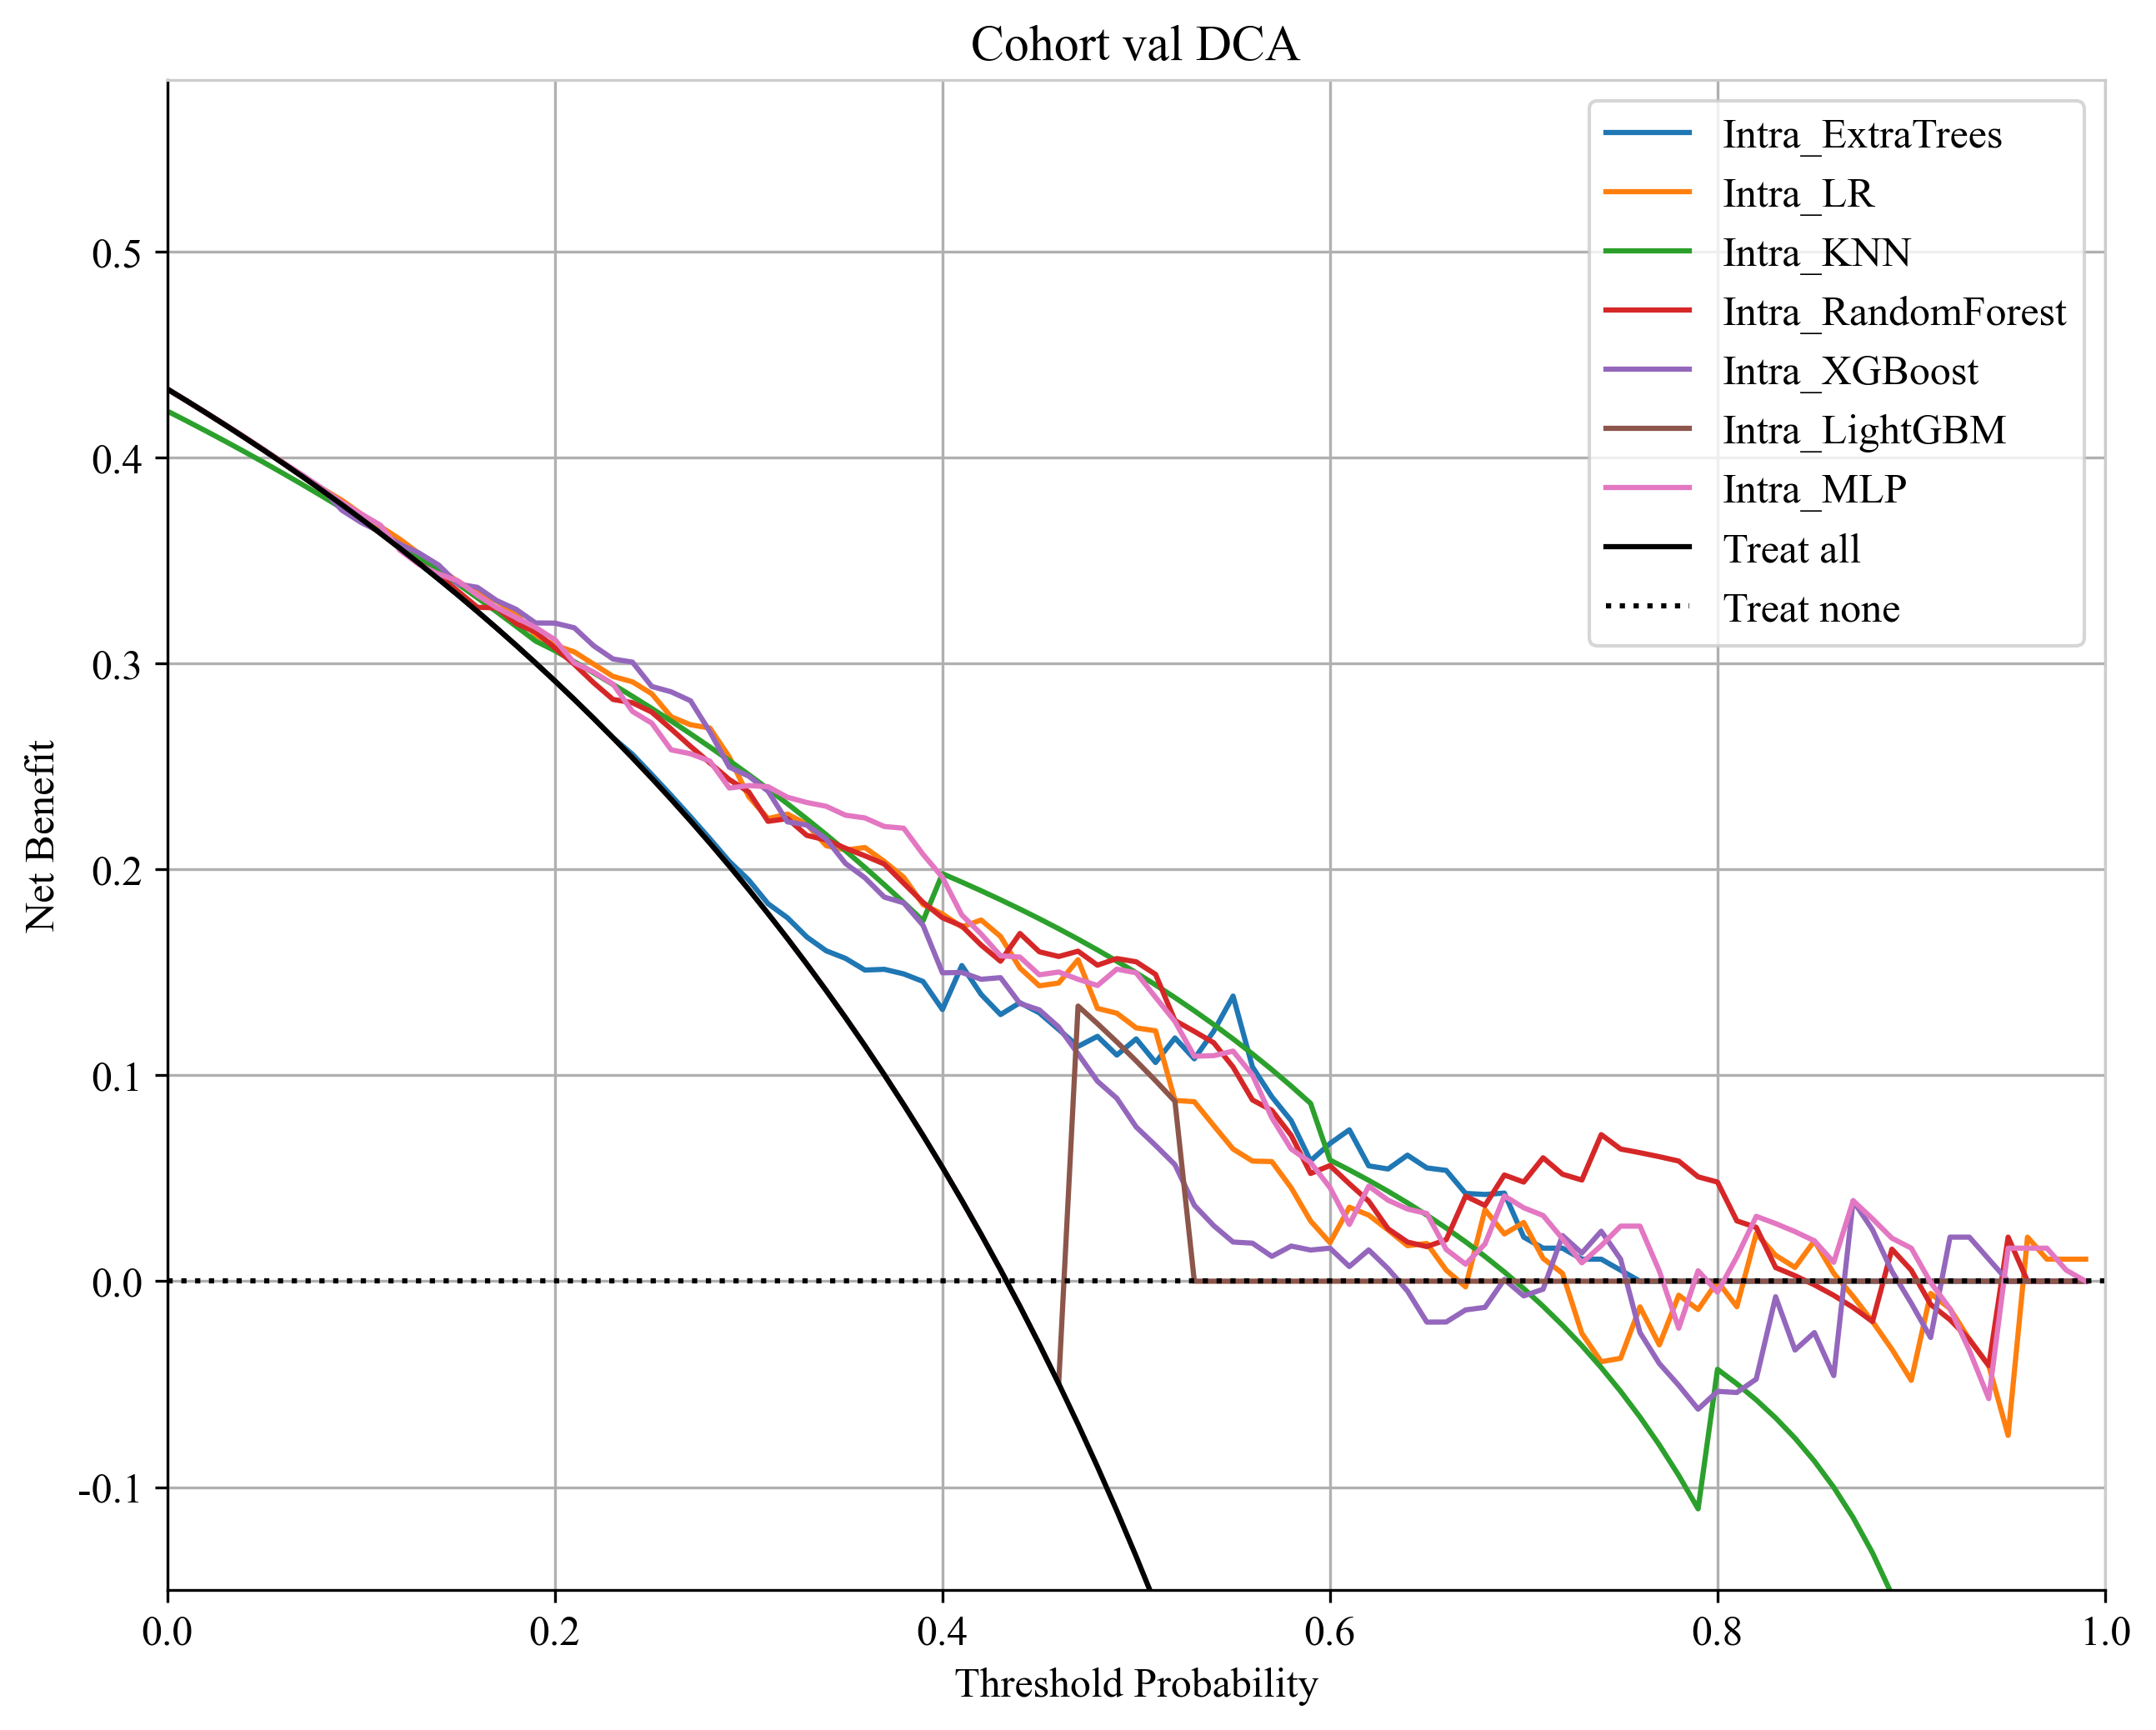

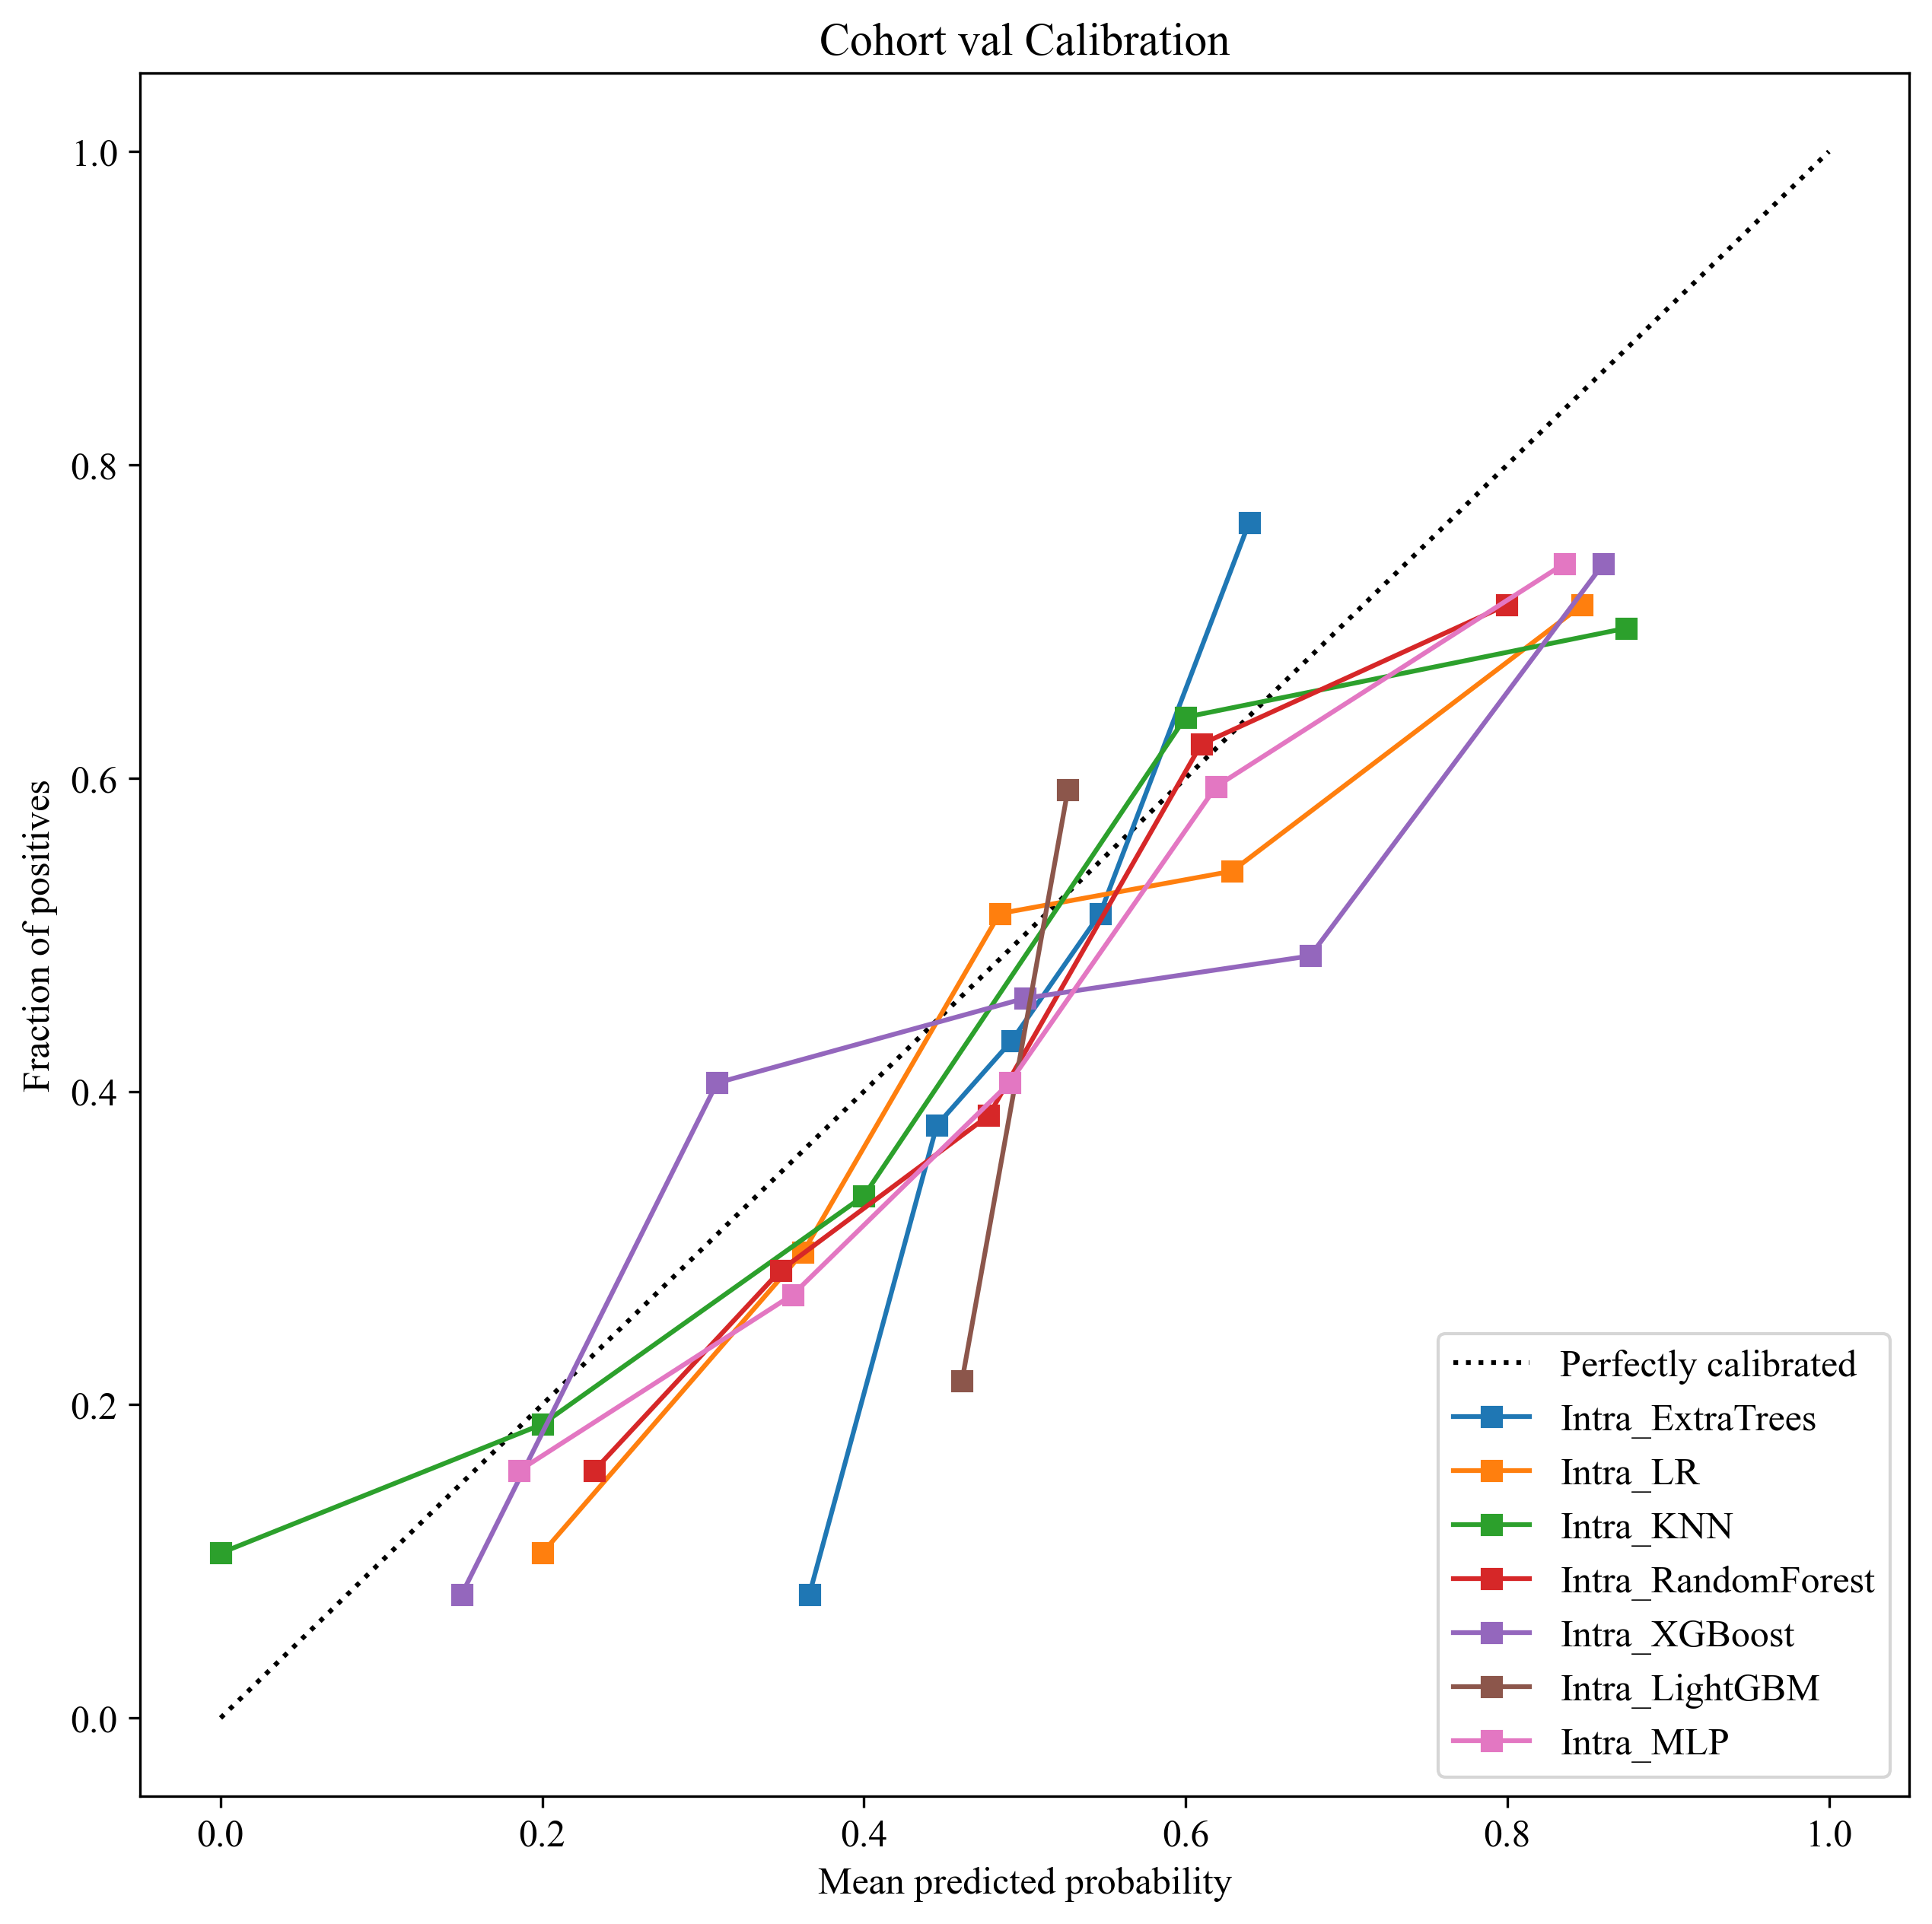

ID   -0_x  Intra_ExtraTrees   -0_y  Intra_LR  -0_x  Intra_KNN  \
0    1219.nii.gz  0.370             0.630  0.275     0.725   0.0        1.0   
1    1221.nii.gz  0.274             0.726  0.098     0.902   0.0        1.0   
2    1222.nii.gz  0.564             0.436  0.711     0.289   0.8        0.2   
3    1223.nii.gz  0.561             0.439  0.806     0.194   0.6        0.4   
4    1224.nii.gz  0.521             0.479  0.618     0.382   0.8        0.2   
..           ...    ...               ...    ...       ...   ...        ...   
126  1411.nii.gz  0.638             0.362  0.784     0.216   1.0        0.0   
127  1412.nii.gz  0.488             0.512  0.632     0.368   0.4        0.6   
128  1413.nii.gz  0.717             0.283  0.959     0.041   1.0        0.0   
129  1414.nii.gz  0.457             0.543  0.501     0.499   0.6        0.4   
130  1415.nii.gz  0.313             0.687  0.108     0.892   0.4        0.6   

      -0_y  Intra_RandomForest   -0_x  Intra_XGBoost   -0_y  Intra_LightGBM  \
0    0.239               0.761  0.336          0.664  0.473           0.527   
1    0.279               0.721  0.085          0.915  0.473           0.527   
2    0.583               0.417  0.737          0.263  0.473           0.527   
3    0.625               0.375  0.707          0.293  0.539           0.461   
4    0.589               0.411  0.772          0.228  0.473           0.527   
..     ...                 ...    ...            ...    ...             ...   
126  0.786               0.214  0.897          0.103  0.539           0.461   
127  0.491               0.509  0.563          0.437  0.473           0.527   
128  0.862               0.138  0.887          0.113  0.539           0.461   
129  0.491               0.509  0.312          0.688  0.473           0.527   
130  0.414               0.586  0.323          0.677  0.473           0.527   

        -0  Intra_MLP  location group  label  
0    0.259      0.741         2  test      1  
1    0.072      0.928         1  test      1  
2    0.703      0.297         2  test      1  
3    0.814      0.186         2  test      1  
4    0.644      0.356         2  test      0  
..     ...        ...       ...   ...    ...  
126  0.827      0.173         1  test      0  
127  0.564      0.436         2  test      1  
128  0.982      0.018         2  test      0  
129  0.485      0.515         1  test      0  
130  0.172      0.828         1  test      1  

[131 rows x 18 columns]

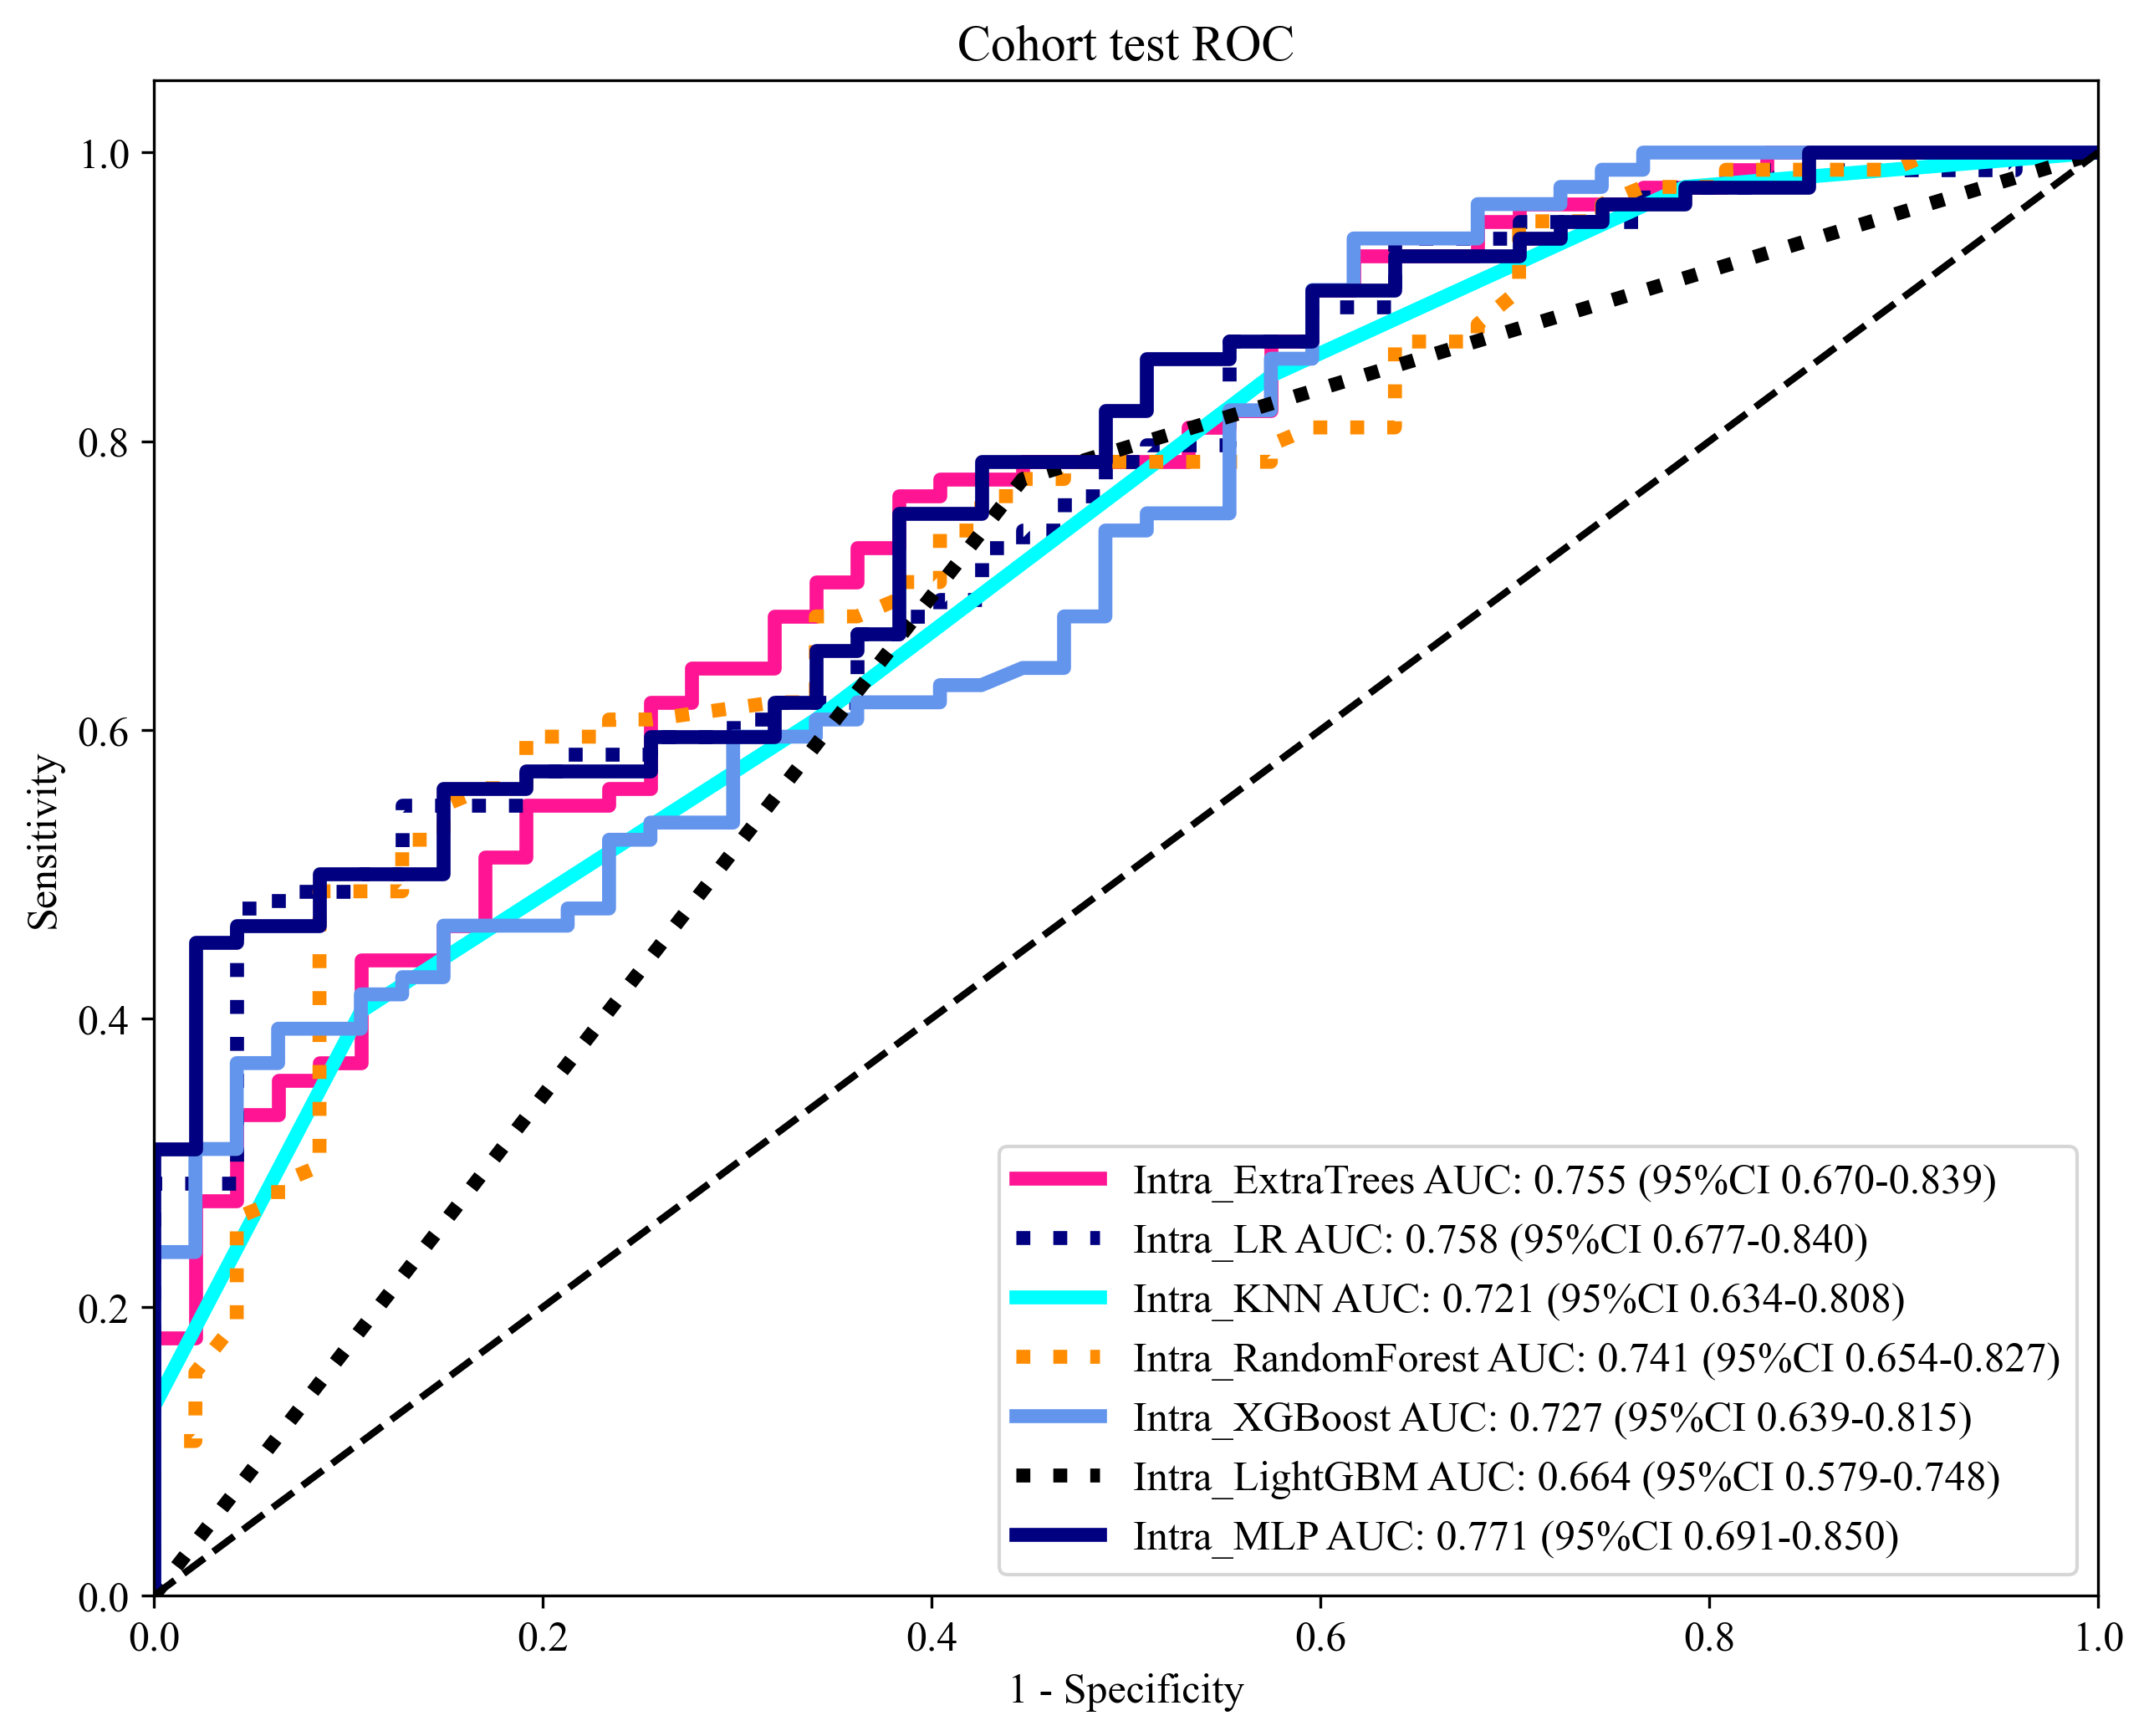

Signature  Accuracy    AUC           95% CI  Sensitivity  \
0     Intra_ExtraTrees     0.708  0.784  0.7429 - 0.8258        0.747   
1             Intra_LR     0.708  0.764  0.7206 - 0.8077        0.670   
2            Intra_KNN     0.758  0.836  0.8010 - 0.8712        0.738   
3   Intra_RandomForest     0.762  0.824  0.7862 - 0.8628        0.814   
4        Intra_XGBoost     0.964  0.992  0.9870 - 0.9980        0.973   
5       Intra_LightGBM     0.667  0.667  0.6243 - 0.7106        0.760   
6            Intra_MLP     0.729  0.793  0.7521 - 0.8340        0.729   
7     Intra_ExtraTrees     0.733  0.764  0.6962 - 0.8311        0.556   
8             Intra_LR     0.690  0.754  0.6851 - 0.8220        0.852   
9            Intra_KNN     0.717  0.749  0.6806 - 0.8180        0.679   
10  Intra_RandomForest     0.727  0.760  0.6913 - 0.8281        0.728   
11       Intra_XGBoost     0.636  0.738  0.6681 - 0.8088        0.938   
12      Intra_LightGBM     0.674  0.688  0.6226 - 0.7524        0.790   
13           Intra_MLP     0.727  0.765  0.6976 - 0.8333        0.753   
14    Intra_ExtraTrees     0.710  0.755  0.6703 - 0.8389        0.762   
15            Intra_LR     0.649  0.758  0.6767 - 0.8400        0.476   
16           Intra_KNN     0.580  0.721  0.6341 - 0.8076        0.405   
17  Intra_RandomForest     0.672  0.741  0.6541 - 0.8269        0.595   
18       Intra_XGBoost     0.588  0.727  0.6392 - 0.8150        0.393   
19      Intra_LightGBM     0.695  0.664  0.5787 - 0.7483        0.774   
20           Intra_MLP     0.641  0.771  0.6914 - 0.8502        0.452   

    Specificity    PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0         0.670  0.693  0.725      0.693   0.747  0.719      0.482  train  
1         0.747  0.725  0.693      0.725   0.670  0.696      0.511  train  
2         0.778  0.769  0.748      0.769   0.738  0.753      0.600  train  
3         0.710  0.738  0.793      0.738   0.814  0.774      0.446  train  
4         0.955  0.956  0.972      0.956   0.973  0.964      0.467  train  
5         0.575  0.641  0.706      0.641   0.760  0.696      0.527  train  
6         0.729  0.729  0.729      0.729   0.729  0.729      0.488  train  
7         0.868  0.763  0.719      0.763   0.556  0.643      0.545    val  
8         0.566  0.600  0.833      0.600   0.852  0.704      0.427    val  
9         0.745  0.671  0.752      0.671   0.679  0.675      0.600    val  
10        0.726  0.670  0.778      0.670   0.728  0.698      0.500    val  
11        0.406  0.547  0.896      0.547   0.938  0.691      0.272    val  
12        0.585  0.593  0.785      0.593   0.790  0.677      0.527    val  
13        0.708  0.663  0.789      0.663   0.753  0.705      0.496    val  
14        0.617  0.780  0.592      0.780   0.762  0.771      0.481   test  
15        0.957  0.952  0.506      0.952   0.476  0.635      0.642   test  
16        0.894  0.872  0.457      0.872   0.405  0.553      0.800   test  
17        0.809  0.847  0.528      0.847   0.595  0.699      0.523   test  
18        0.936  0.917  0.463      0.917   0.393  0.550      0.744   test  
19        0.553  0.756  0.578      0.756   0.774  0.765      0.527   test  
20        0.979  0.974  0.500      0.974   0.452  0.618      0.639   test

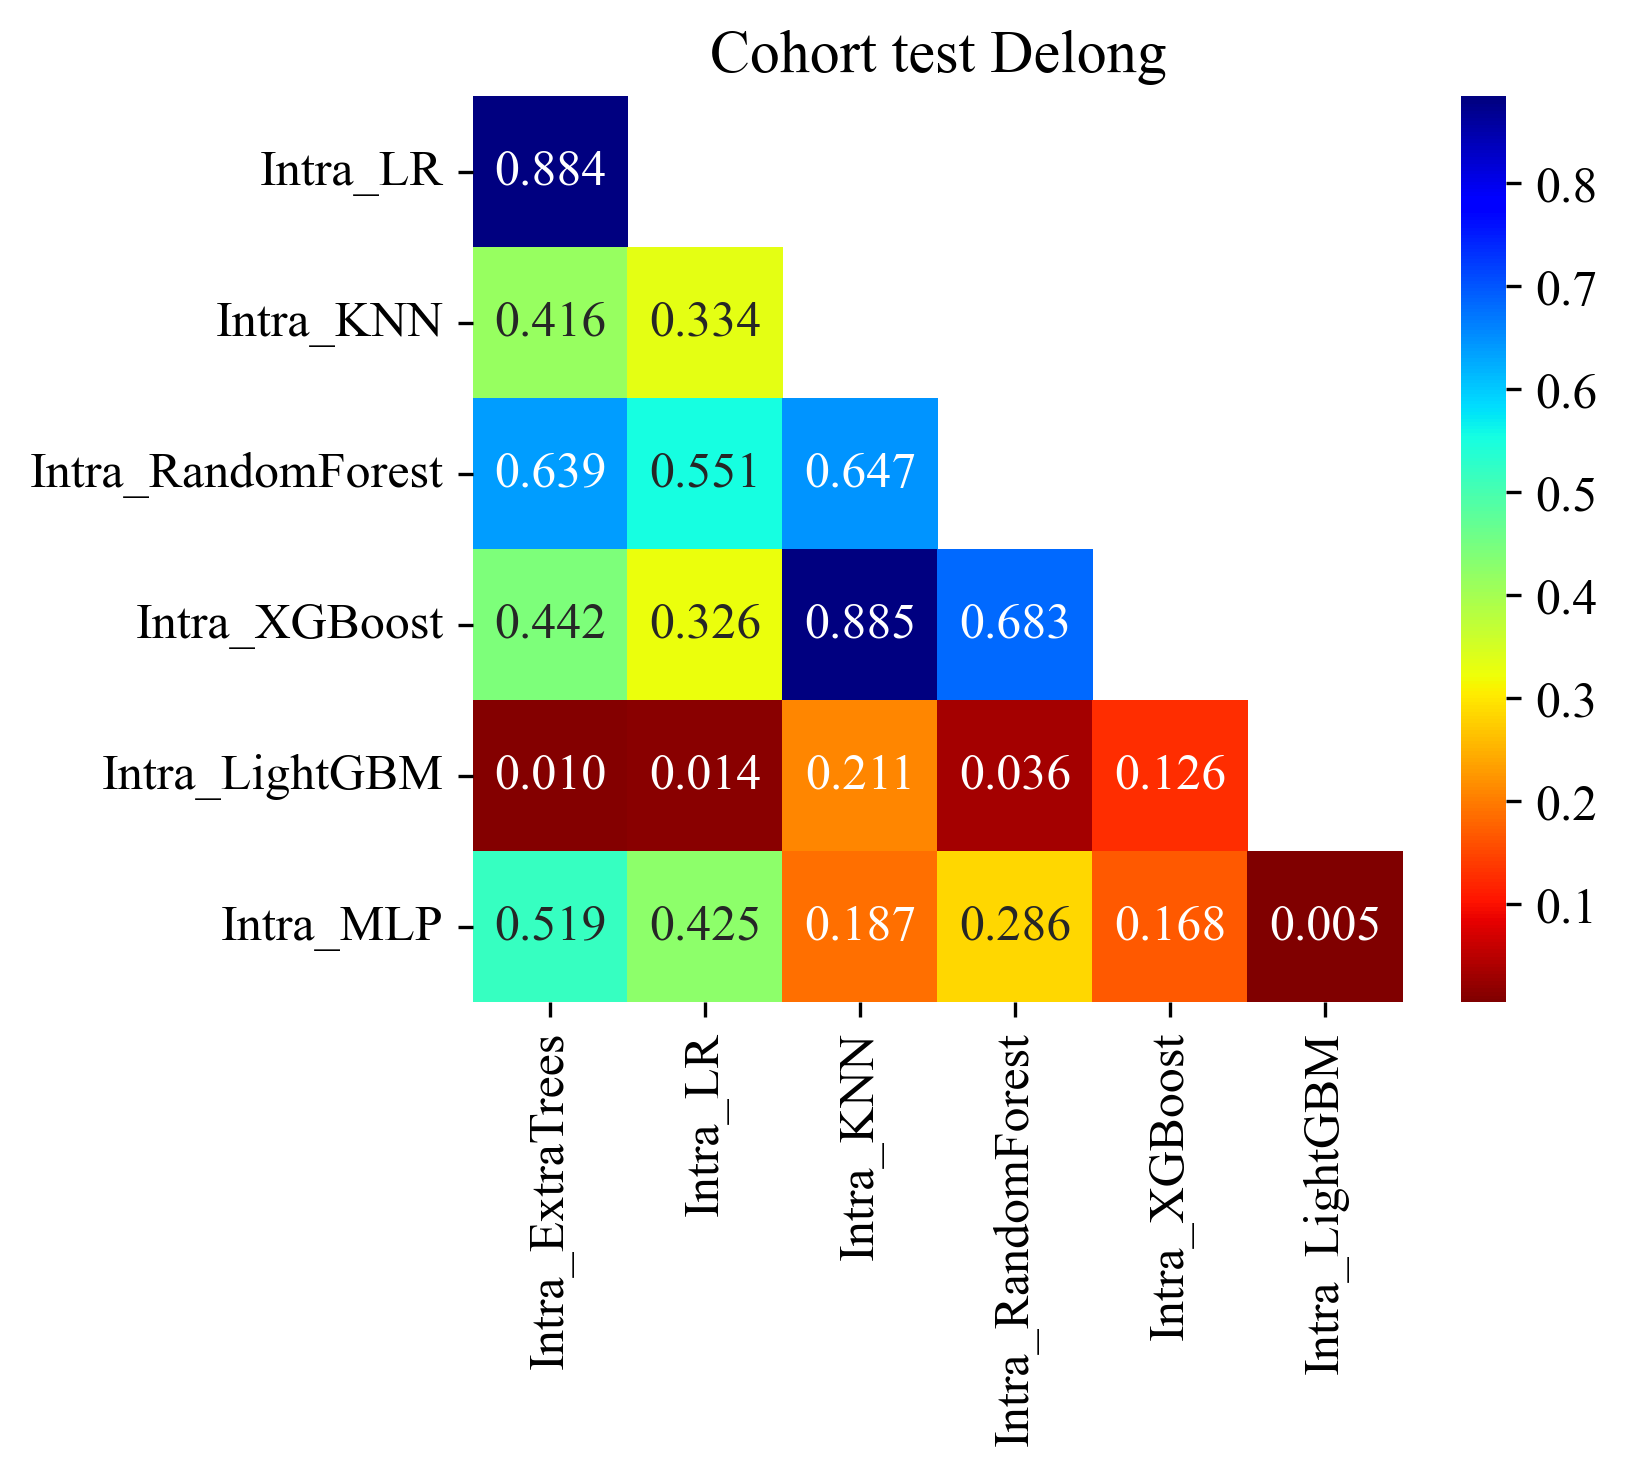

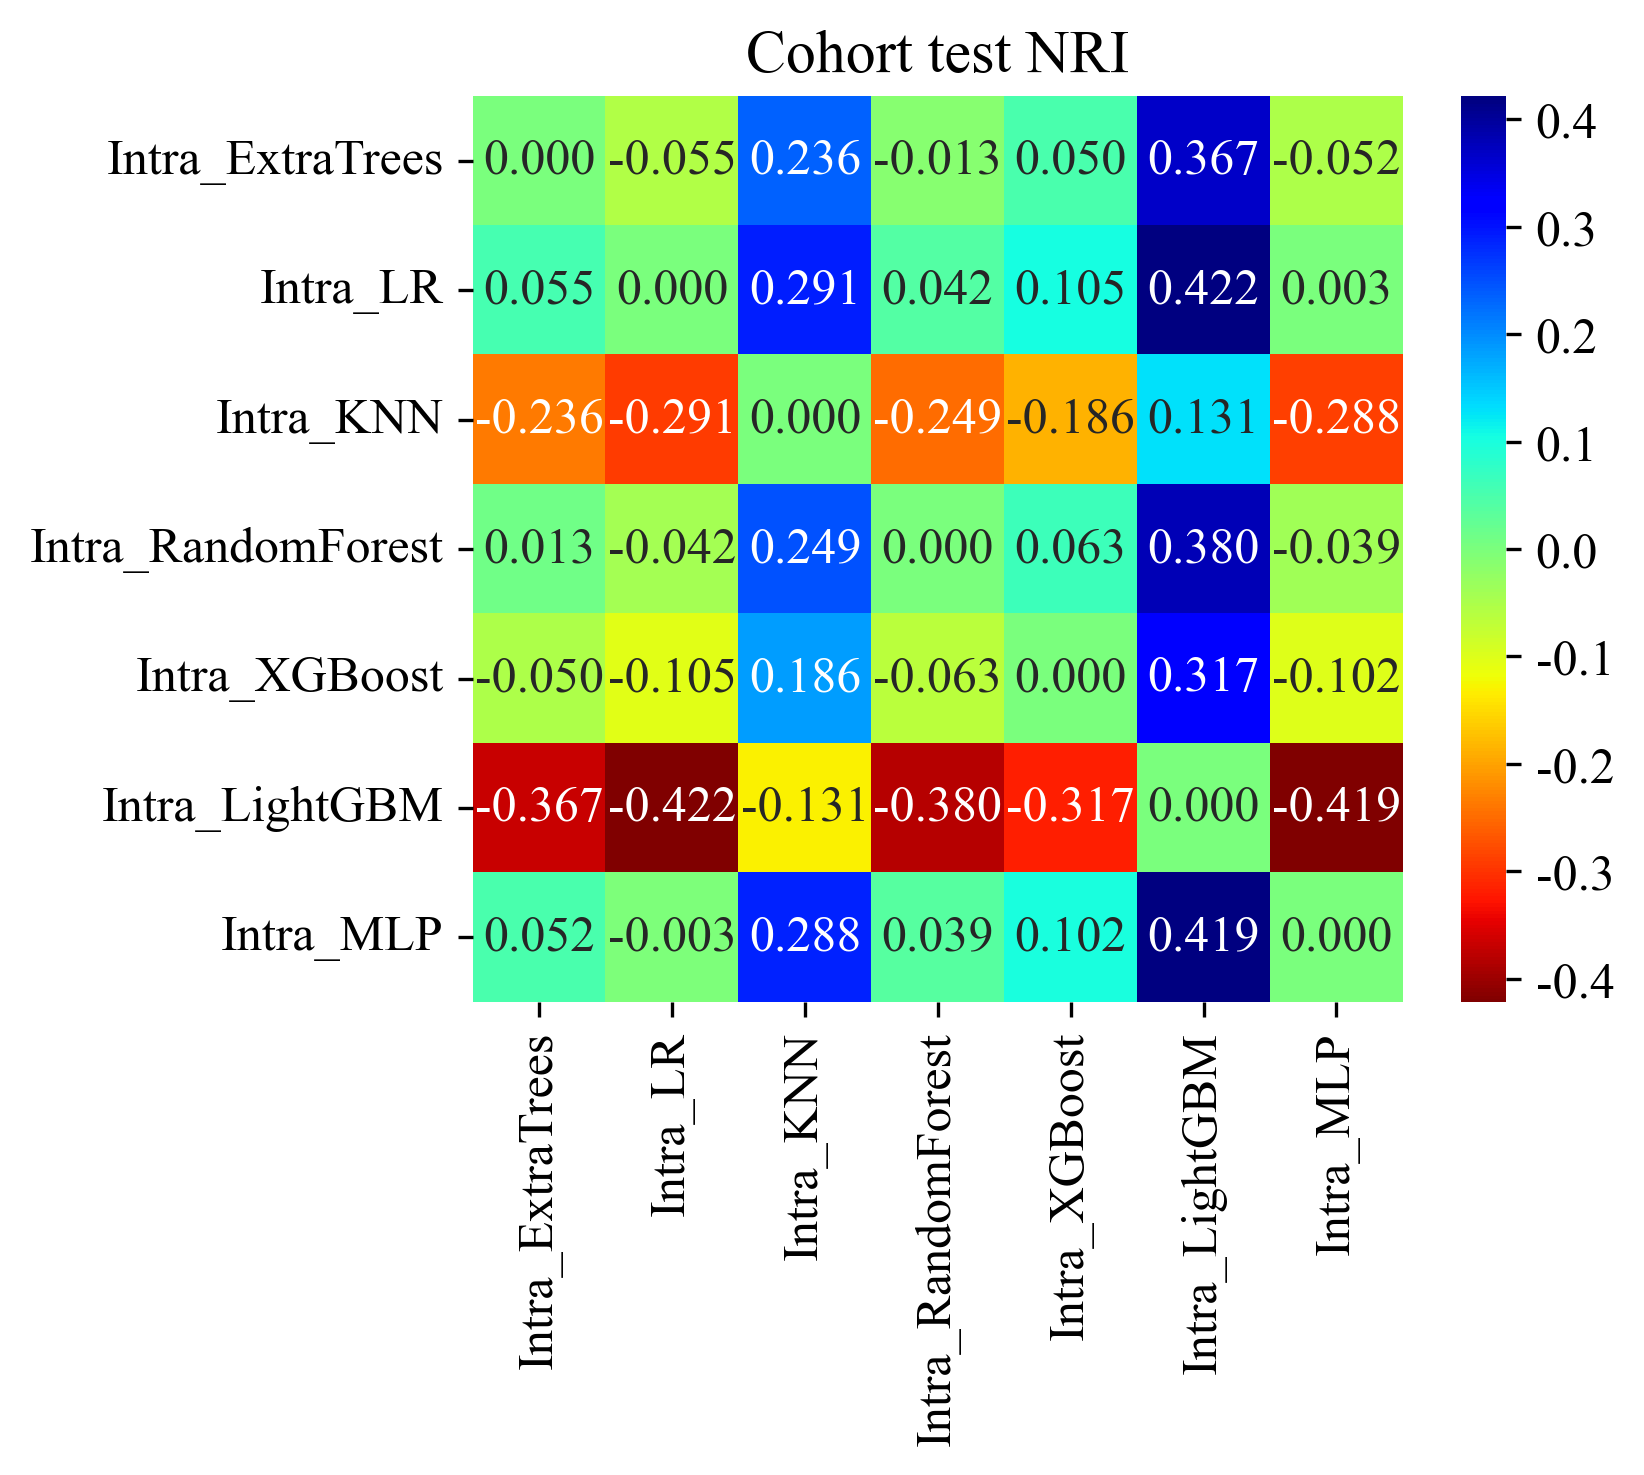

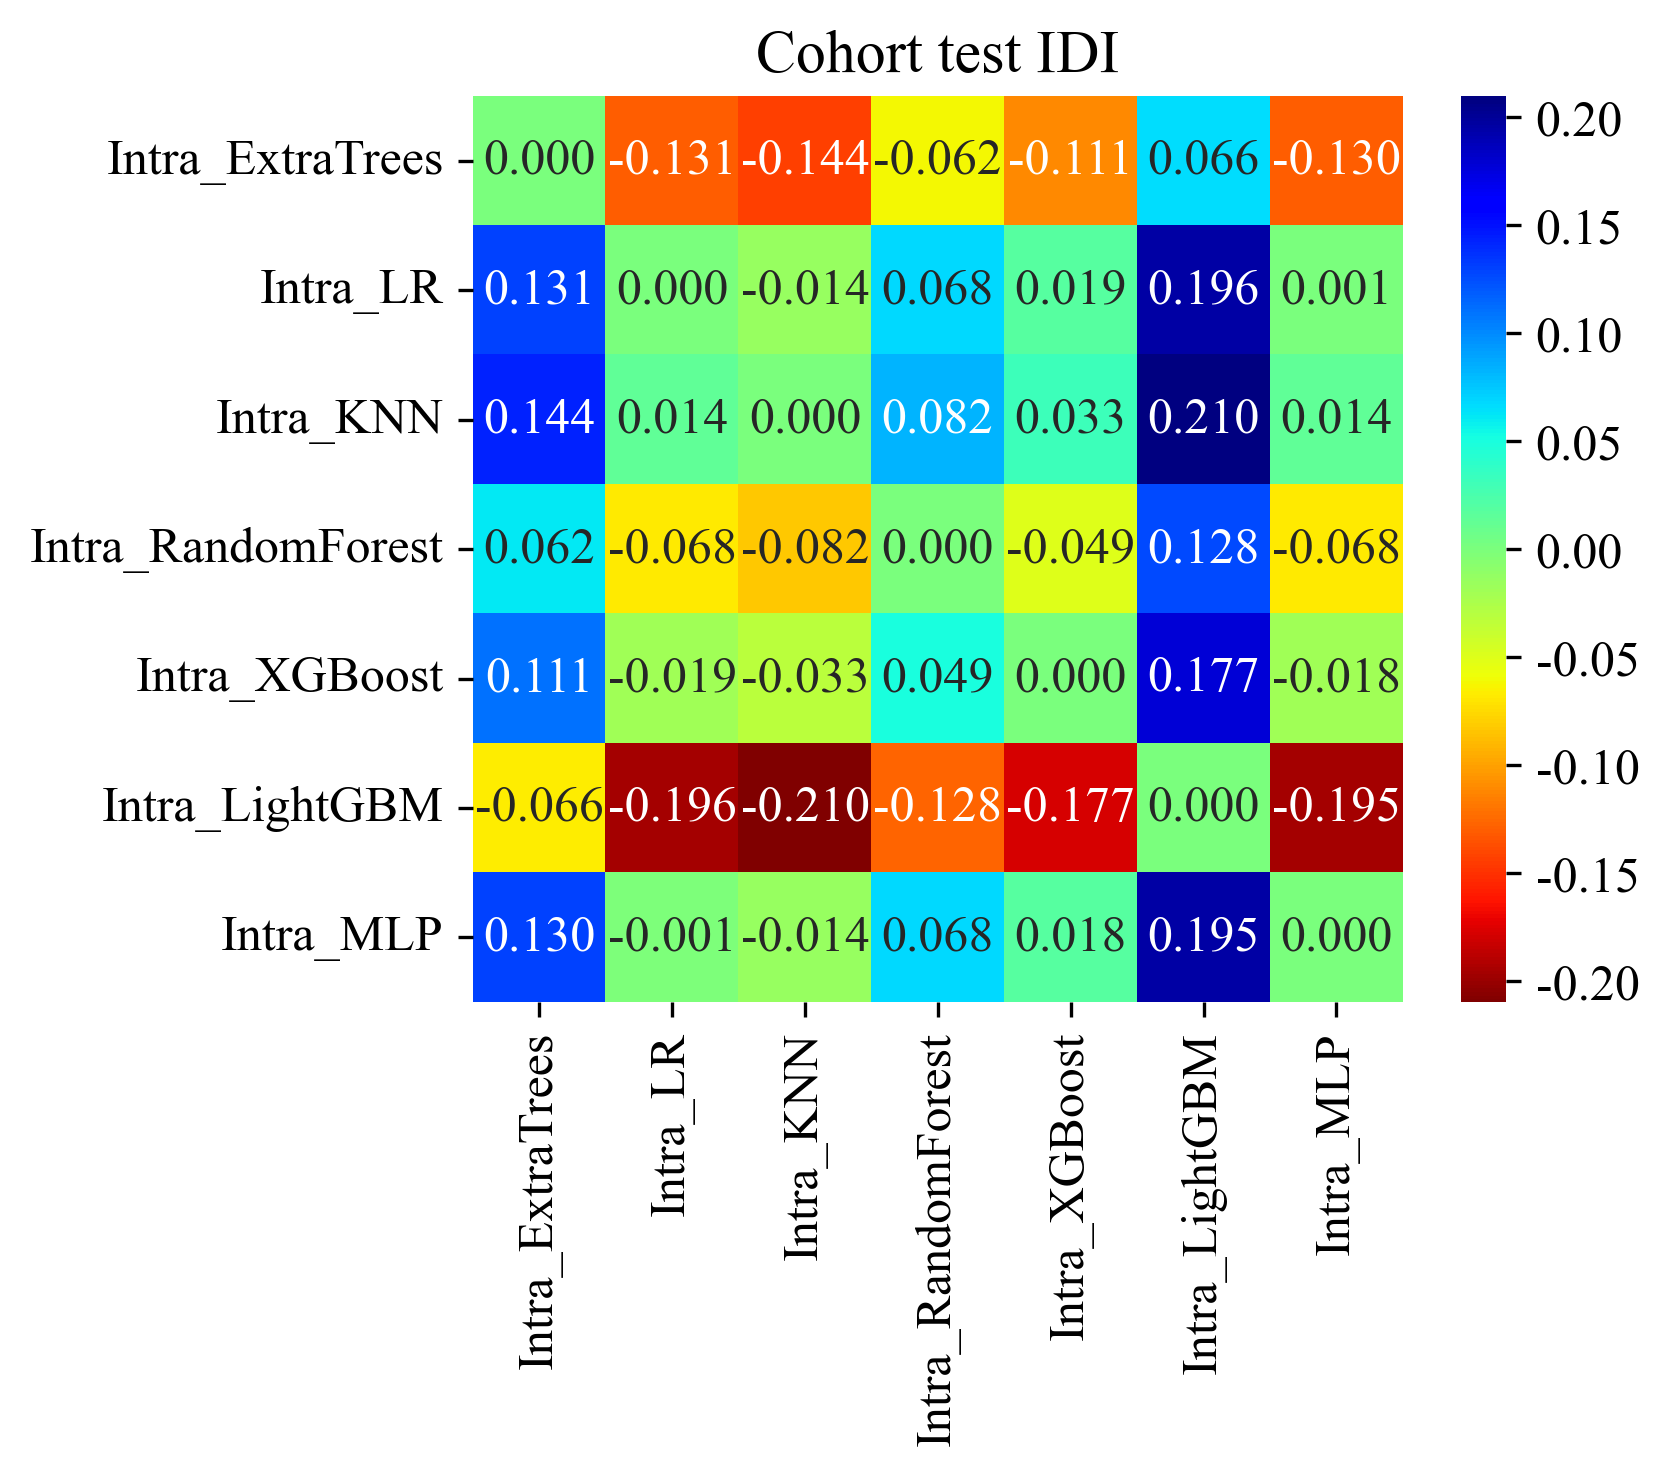

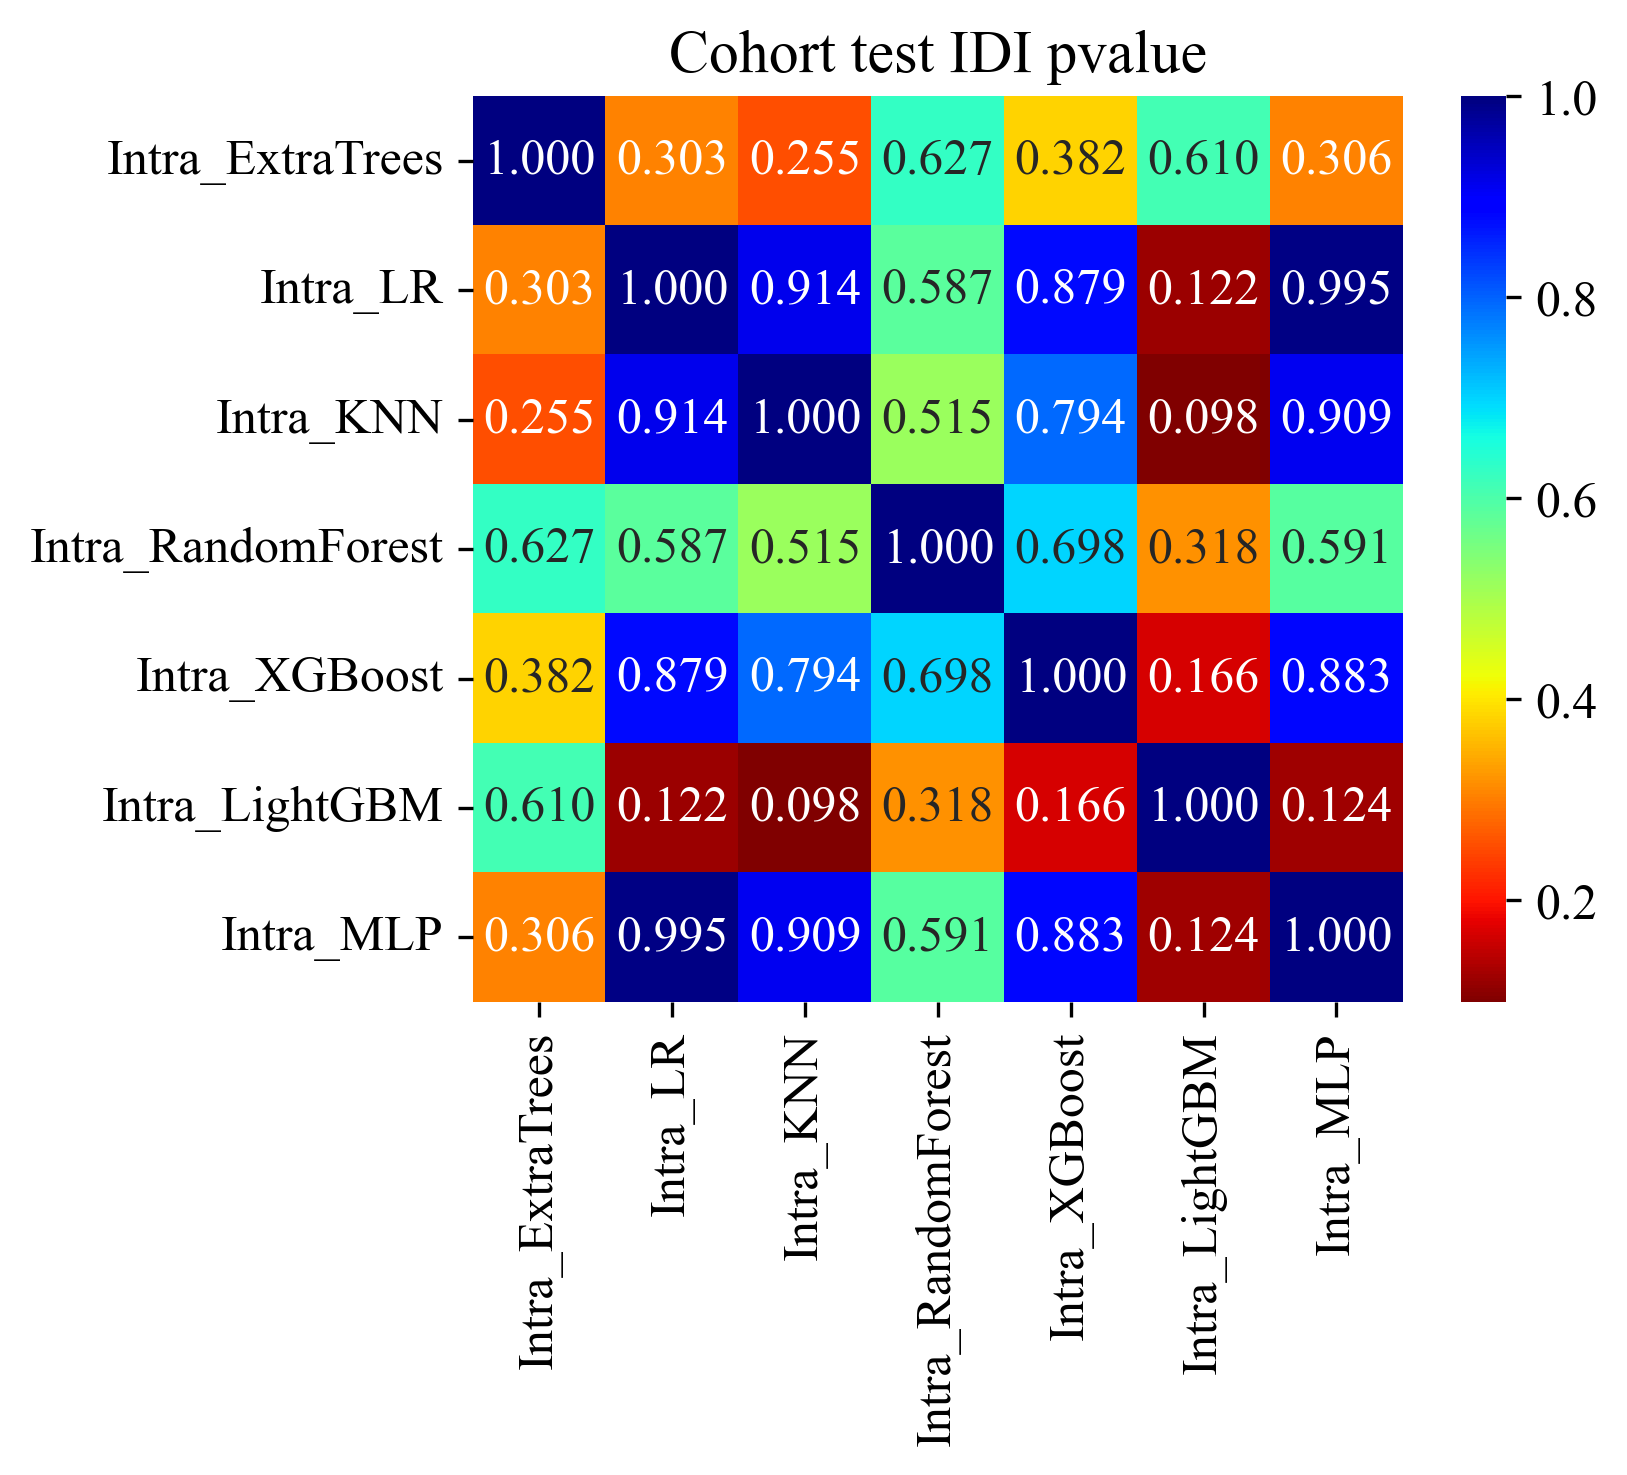

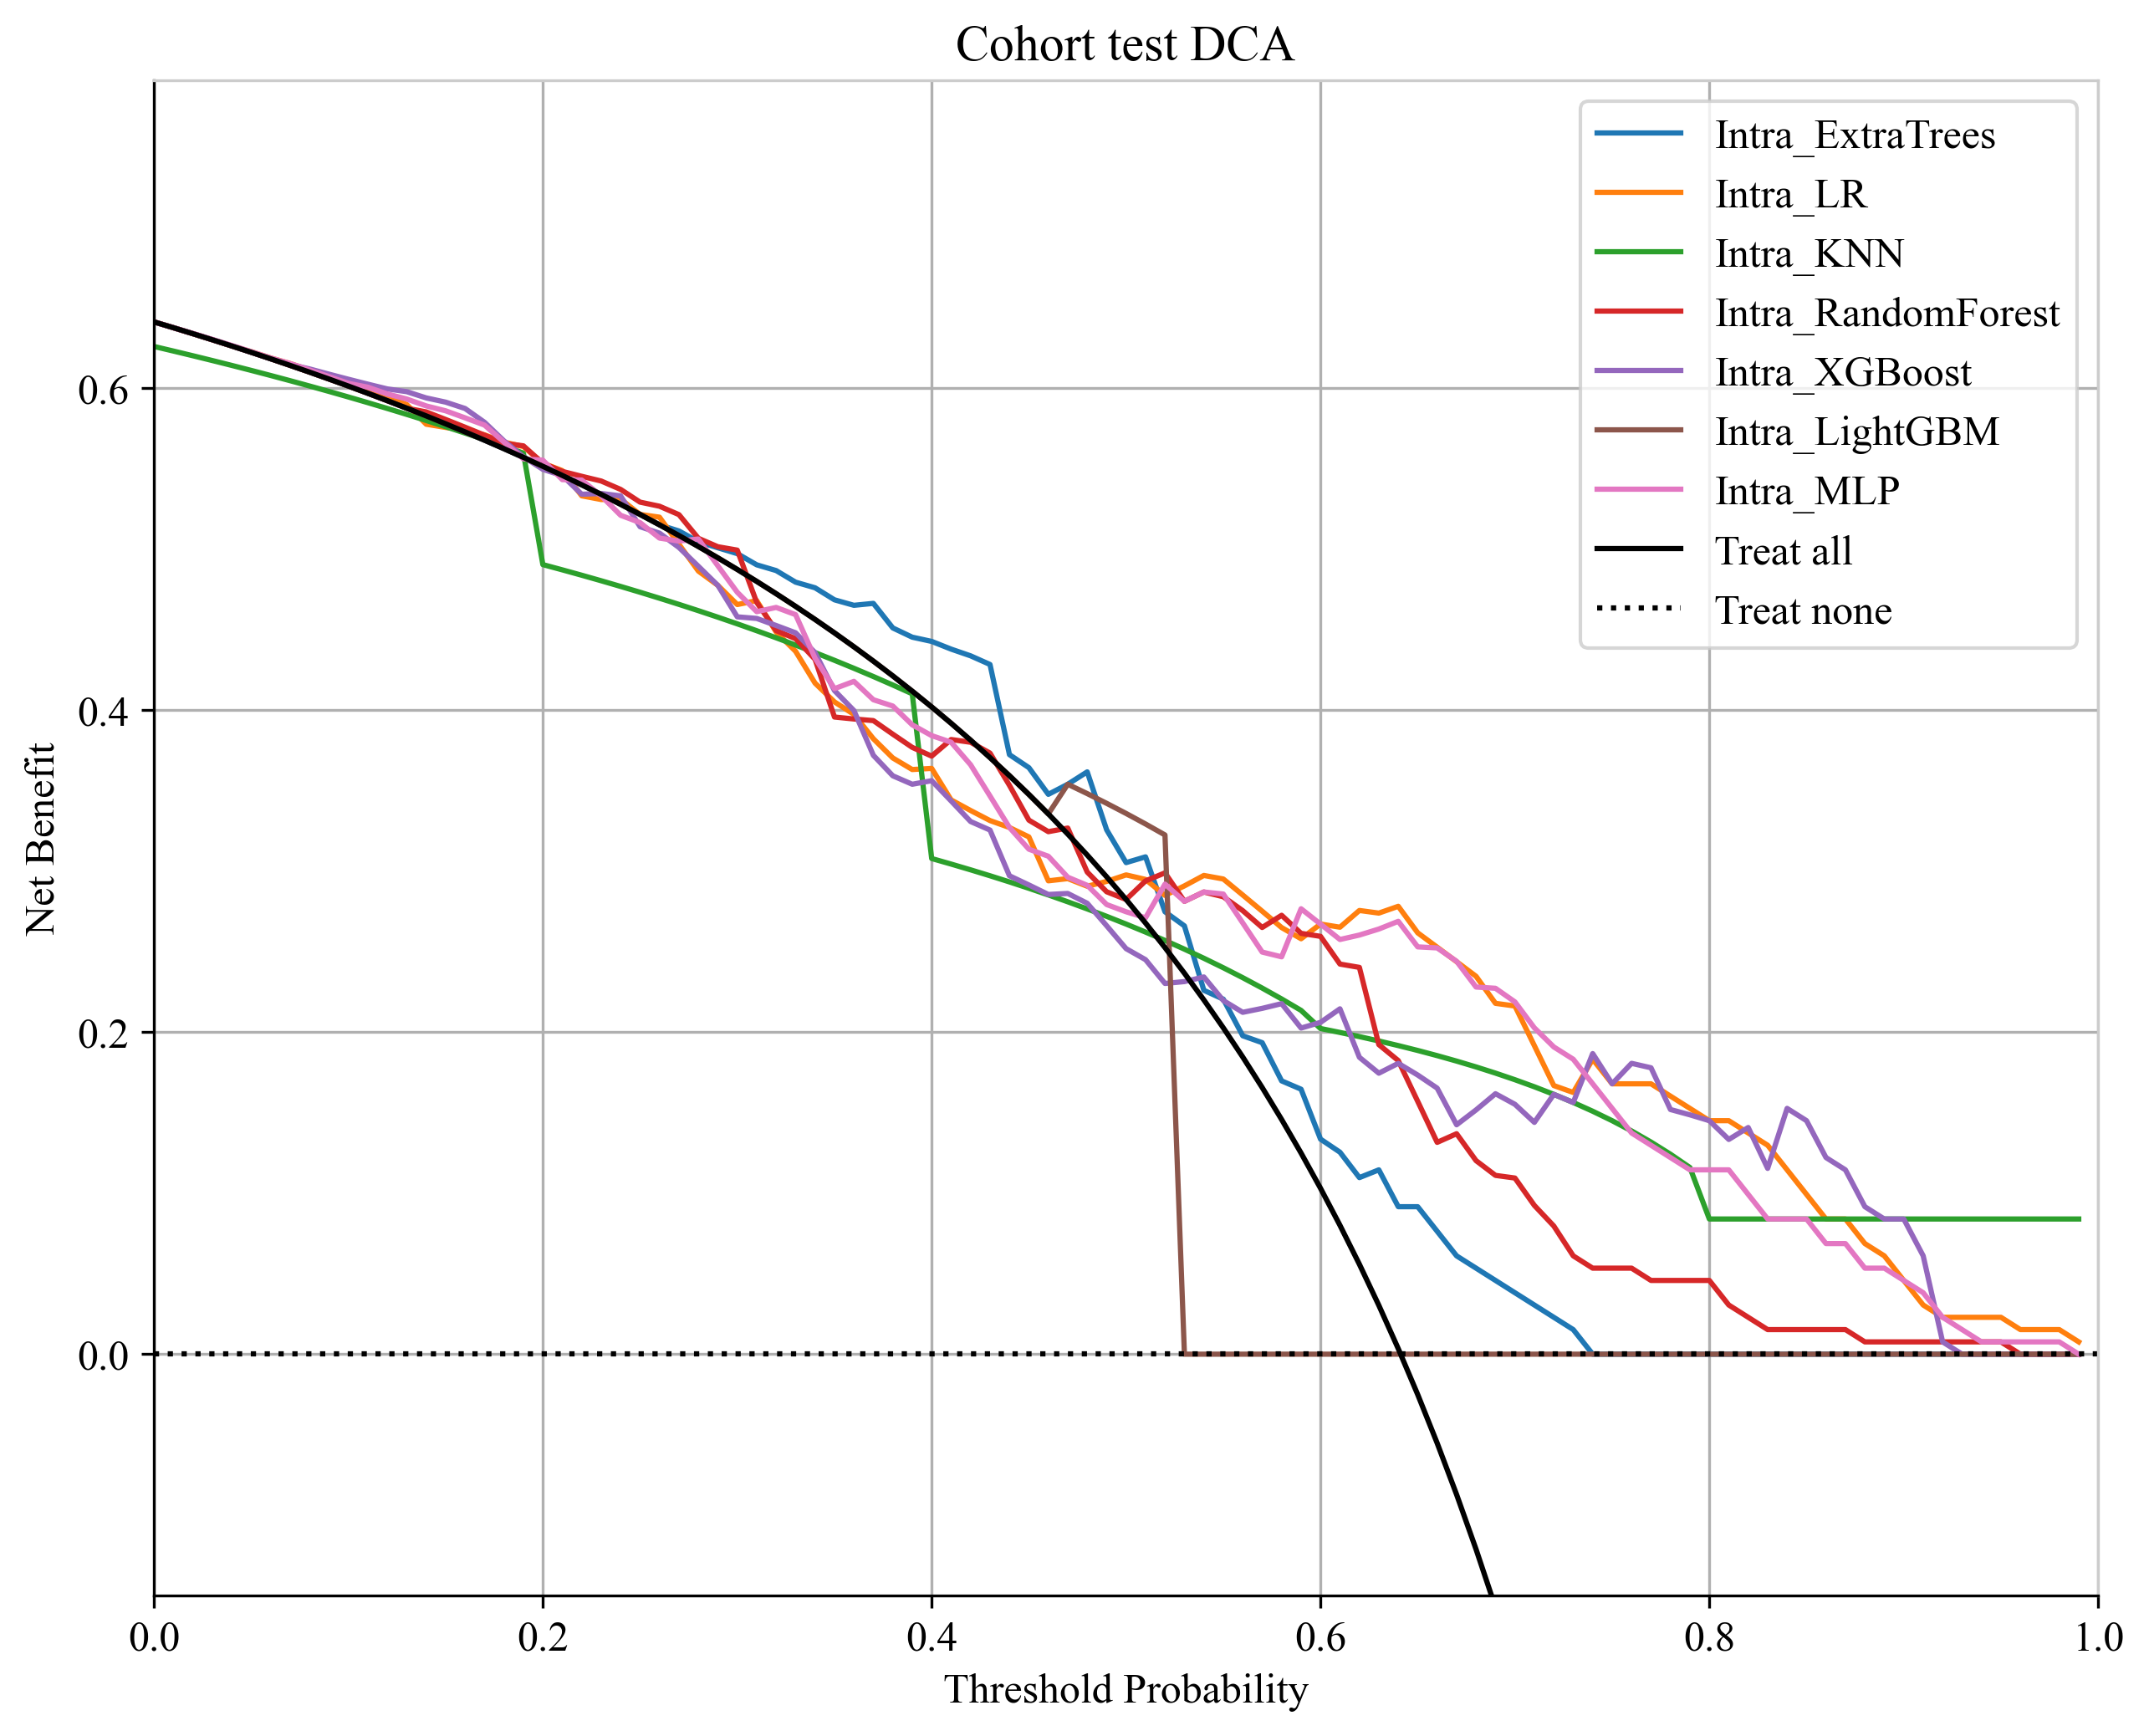

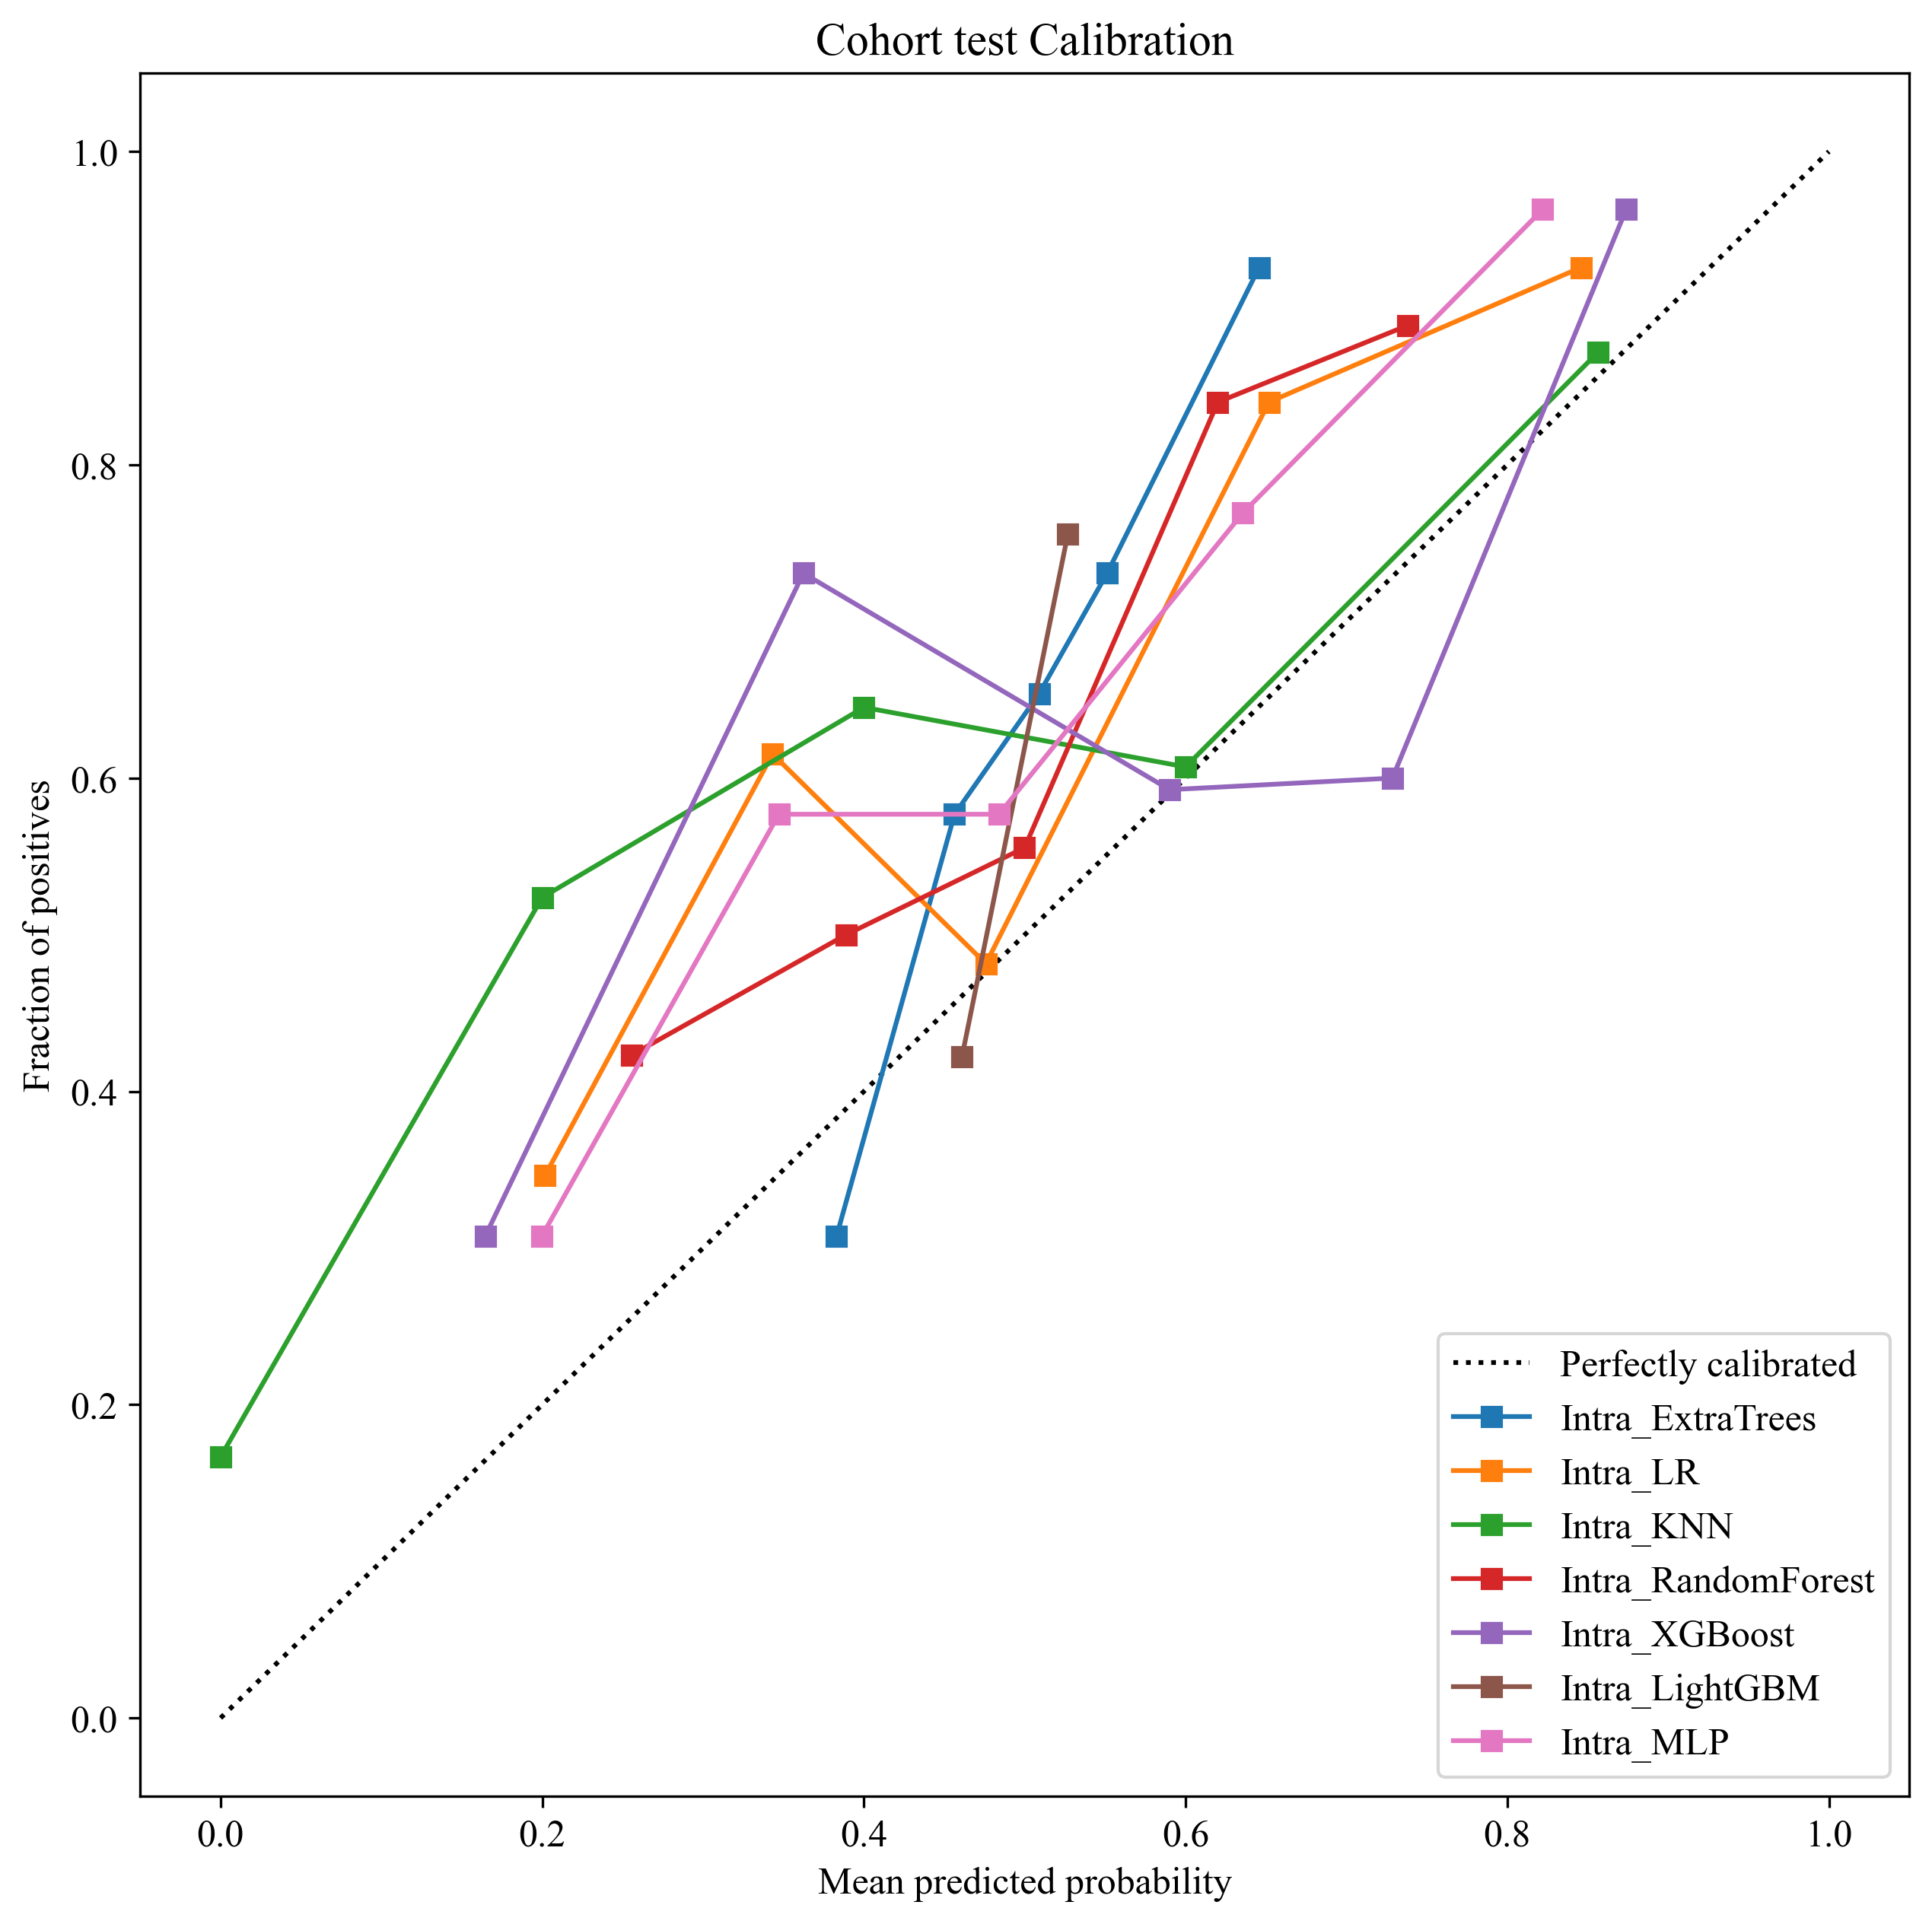

Intra_ExtraTrees  Intra_LR  Intra_KNN  Intra_RandomForest  Intra_XGBoost  \
0         7.608e-08     0.705  9.879e-01               0.002      1.110e-16   
1         1.830e-03     0.245  0.000e+00               0.223      2.183e-02   
2         3.323e-03     0.004  3.201e-04               0.017      3.126e-04   

   Intra_LightGBM  Intra_MLP Cohort  
0           1.000      0.579  train  
1           0.918      0.053    val  
2           0.277      0.002   test

In [2]:
import pandas as pd
from onekey_algo.custom.components.comp1 import normalize_df, merge_results
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from onekey_algo.custom.components import metrics
from onekey_algo.custom.components.delong import delong_roc_test
from onekey_algo.custom.components.comp1 import draw_matrix
from onekey_algo.custom.components.metrics import NRI, IDI
from onekey_algo.custom.components.comp1 import plot_DCA
from onekey_algo.custom.components.comp1 import draw_calibration
from onekey_algo.custom.components import stats
from onekey_algo.custom.components.metrics import analysis_pred_binary

hosmer = []
youden = {}
metric = []
fig_size = (5, 4)
for subset in [s for s in get_param_in_cwd('subsets', ['train', 'test'])]:
    ALL_results = None
    for mn in  model_names:
        r = pd.read_csv(f"./results/{mn}_{subset if subset == 'train' else 'test'}.csv")
        r.columns = ['ID', '-0', mn]
        if ALL_results is None:
            ALL_results = r
        else:
            ALL_results = pd.merge(ALL_results, r, on='ID', how='inner')
    Clinic = pd.read_csv('data/clinic_sel.csv')
    cnames = [c for c in Clinic.columns if c not in ['ID', 'group', 'label']]
    ALL_results =merge_results(ALL_results, Clinic[['ID'] + cnames], label_data[label_data['group'] == subset], label_col='ID')
    ALL_results = ALL_results.dropna(axis=1)
    display(ALL_results)
    # 绘制整体的ROC曲线
    pred_column = [f'{task}-0', f'{task}-1']
    gt = [np.array(ALL_results[task]) for _ in model_names]
    pred_train = [np.array(ALL_results[d]) for d in model_names]
    okcomp.comp1.draw_roc(gt, pred_train, labels=model_names, title=f'Cohort {subset} ROC', auto_point=False)
    plt.savefig(f'img/mc_{subset}_auc.svg')
    plt.show()
    
    # 汇总所有的Metric
    for mname, y, score in zip(model_names, gt, pred_train):
        # 计算验证集指标
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y, score)
        ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
        youden[mname] = thres
        metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, subset))
    metric_ = pd.DataFrame(metric, index=None, columns=['Signature', 'Accuracy', 'AUC', '95% CI',
                                                       'Sensitivity', 'Specificity', 
                                                       'PPV', 'NPV', 'Precision', 'Recall', 'F1',
                                                       'Threshold', 'Cohort'])

    display(metric_)
    
    # 绘制Delong
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            if i <= j:
                cm[i][j] = np.nan
            else:
                cm[i][j] = delong_roc_test(ALL_results[task], ALL_results[mni], ALL_results[mnj])[0][0]
    cm = pd.DataFrame(cm[1:, :-1], index=model_names[1:], columns=model_names[:-1])
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} Delong')
    plt.savefig(f'img/mc_delong_each_cohort_{subset}.svg', bbox_inches = 'tight')
    plt.show()
    
    # NRI
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j] = NRI(ALL_results[mni] > youden[mni], ALL_results[mnj] > youden[mnj], ALL_results[task])
    cm = pd.DataFrame(cm, index=model_names, columns=model_names)
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} NRI')
    plt.savefig(f'img/mc_NRI_each_cohort_{subset}.svg', bbox_inches = 'tight')
    plt.show()
    
    # IDI
    delong = []
    delong_columns = []
    this_delong = []
    cm = np.zeros((len(model_names), len(model_names)))
    p = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j], p[i][j] = IDI(ALL_results[mni], ALL_results[mnj], ALL_results[task], with_p=True)

    for d, n in zip([cm, p], ['IDI', 'IDI pvalue']):
        plt.figure(figsize=fig_size)
        d = pd.DataFrame(d, index=model_names, columns=model_names)
        draw_matrix(d, annot=True, cmap='jet_r', cbar=True)
        plt.title(f'Cohort {subset} {n}')
        plt.savefig(f'img/mc_{n}_each_cohort_{subset}.svg', bbox_inches = 'tight')
        plt.show()
        
    # DCA
    plot_DCA([ALL_results[model_name] for model_name in model_names], 
             ALL_results[task], title=f'Cohort {subset} DCA', labels=model_names, y_min=-0.15)
    plt.savefig(f'img/mc_{subset}_dca.svg')
    plt.show()
    
    # Calibration
    draw_calibration(pred_scores=pred_train, n_bins=5,
                     y_test=gt, model_names=model_names)
    plt.title(f'Cohort {subset} Calibration')
    plt.savefig(f'img/mc_{subset}_cali.svg')
    plt.show()
    
    # HLTest
    hosmer.append([stats.hosmer_lemeshow_test(y_true, y_pred, bins=10) 
                  for fn, y_true, y_pred in zip(model_names, gt, pred_train)])
pd.concat([pd.DataFrame(hosmer, columns=model_names), pd.DataFrame(get_param_in_cwd('subsets'), columns=['Cohort'])], axis=1)